**1. Importing libraries**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import optlib.optical as opt

np.seterr(divide='ignore', invalid='ignore')

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams['font.size'] = 14
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook

**2. Path to the directory containing Henke ionisation data (download from https://henke.lbl.gov/optical_constants/asf.html)**

In [2]:
xraypath = '/Users/olgaridzel/Research/Bruce/PHYSDAT/opt/xray/'

**DNA**

In [3]:
A = [2.88,17.04,25.53,2.48,30.87,17.34,27.94,23,23.48,22.85,20.23,25.42,29,17.28,65.7,12.84,32.66,6.22]
gamma = [1.2,2,1.9,1.8,2.5,2.2,2.9,3.6,3.9,5,6.1,15.6,8.2,7.6,73.3,6.9,14.3,6.8]
omega = [6.6,8.5,9.7,10.2,10.8,12,13.3,14.8,16.6,18.7,21,22.9,24,28.1,32,32.5,37.3,50.1]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_drude = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_drude.Eg = 4.5
dna_drude.width_of_the_valence_band = 0.5
dna_drude.atomic_density = 0.087

*Calculate and plot ELF*

<IPython.core.display.Javascript object>


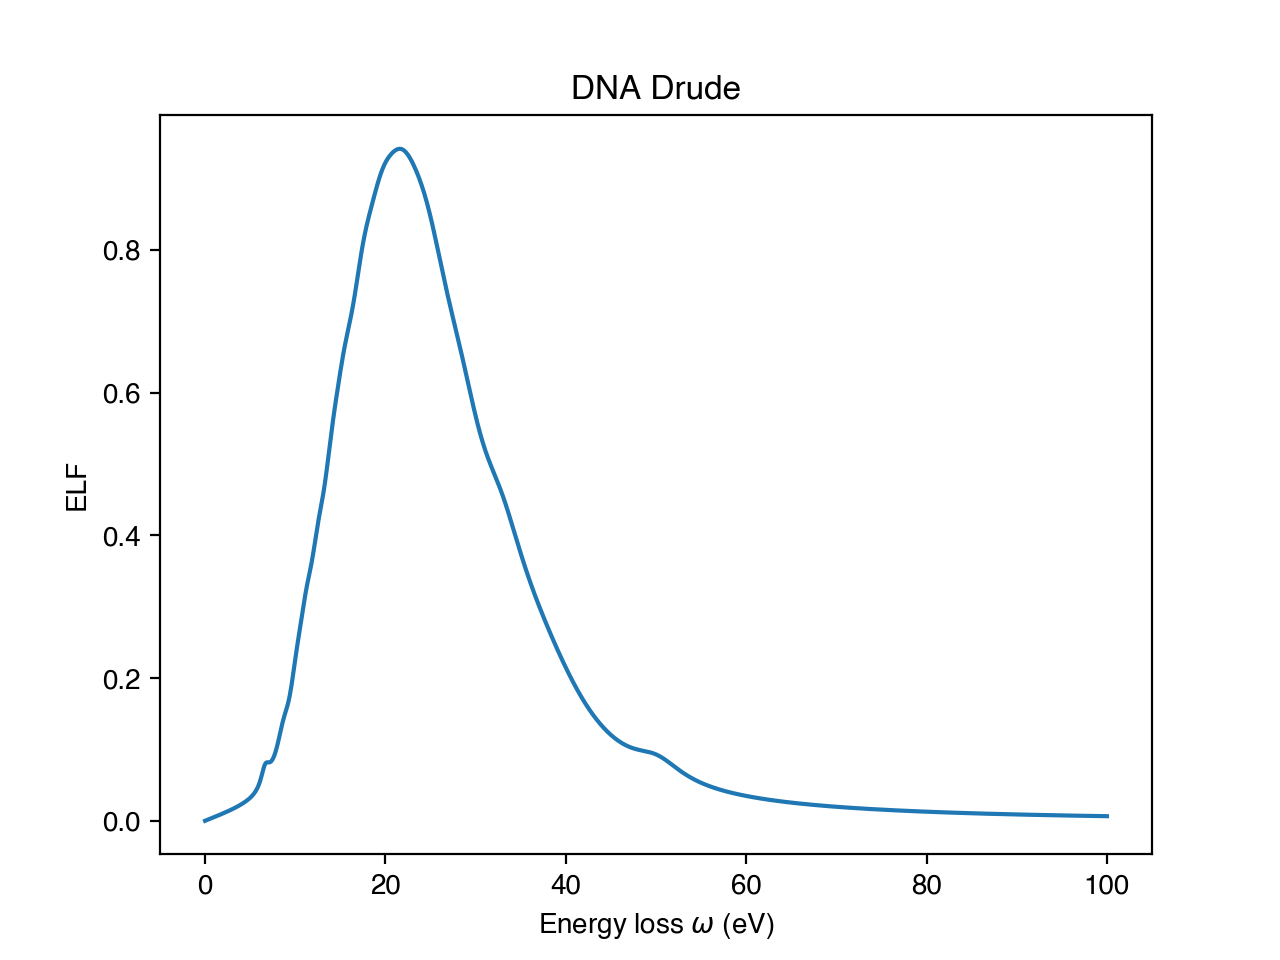

In [4]:
dna_drude.plotELF()

*Calculate and plot normalised DIIMFP*

<IPython.core.display.Javascript object>


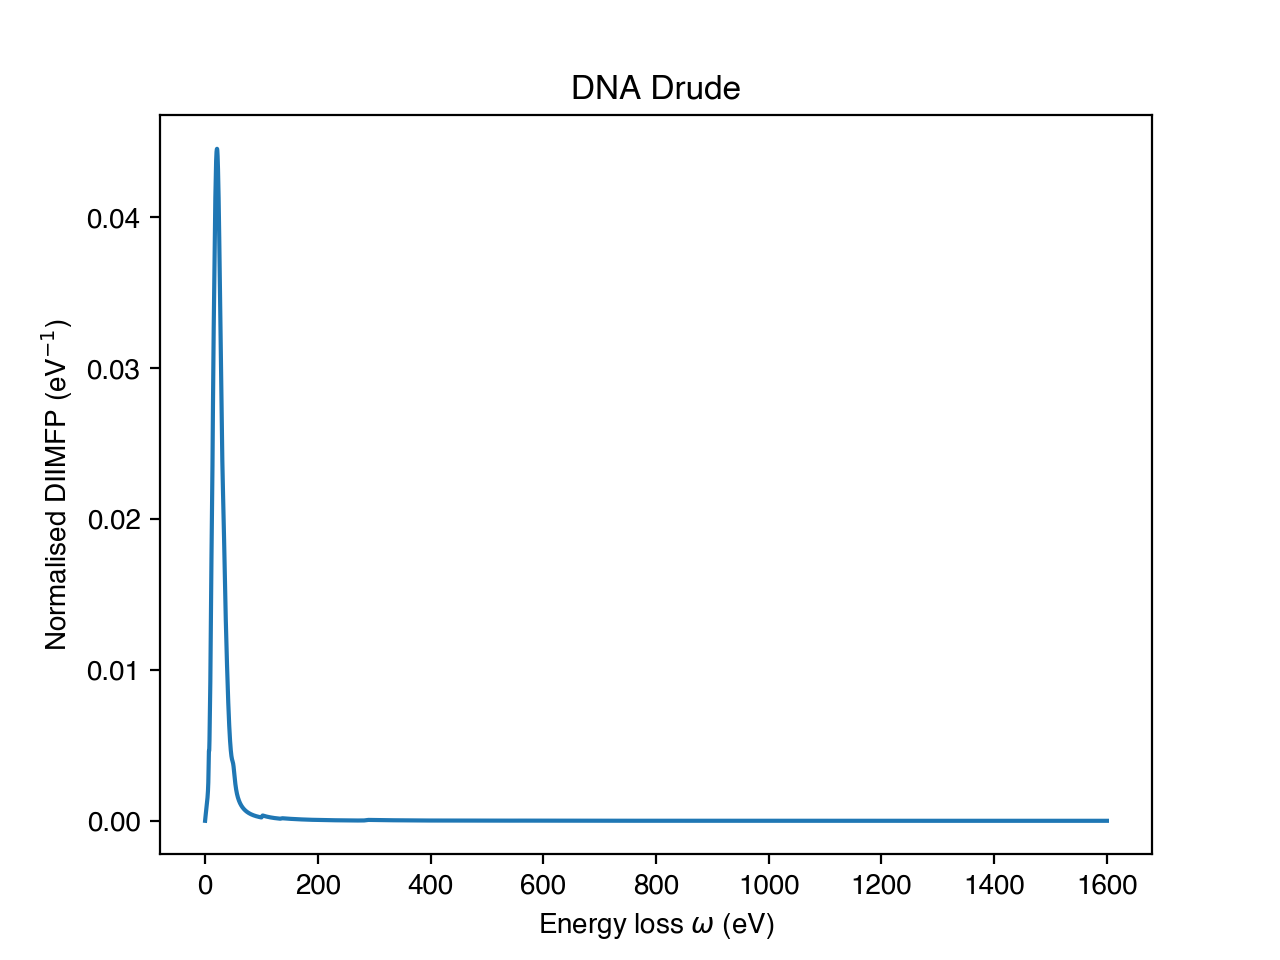

In [5]:
E0 = 1600
dna_drude.plotDIIMFP(E0, normalised=True)

*Calculate and plot IMFP*

<IPython.core.display.Javascript object>


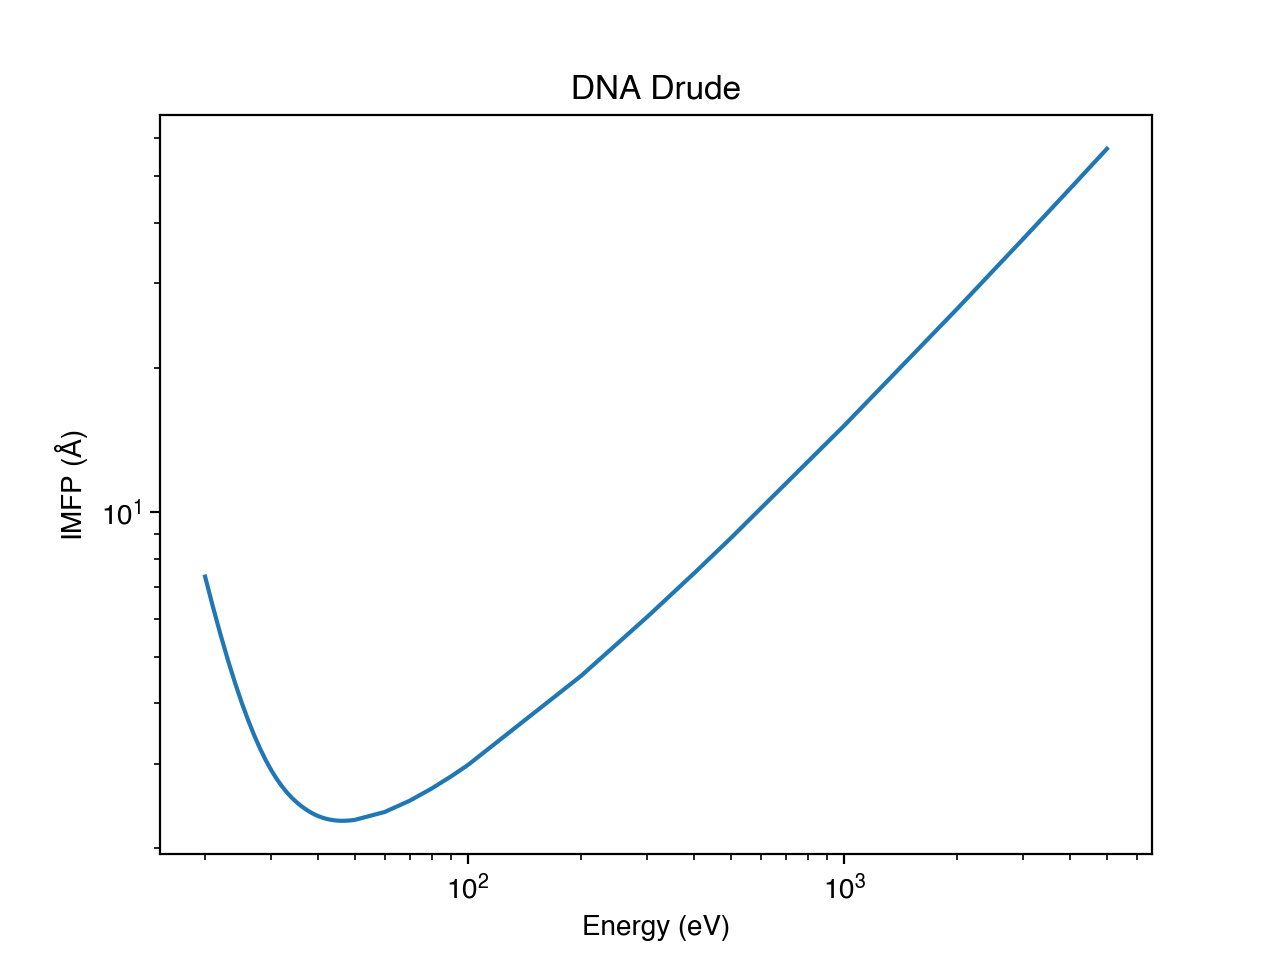

In [6]:
E0 = np.hstack((opt.linspace(20,50),opt.linspace(60,100,10),opt.linspace(200,500,100),opt.linspace(1000,5000,1000)))
dna_drude.plotIMFP(E0, isMetal=False)

*Calculate optical constants*

<IPython.core.display.Javascript object>


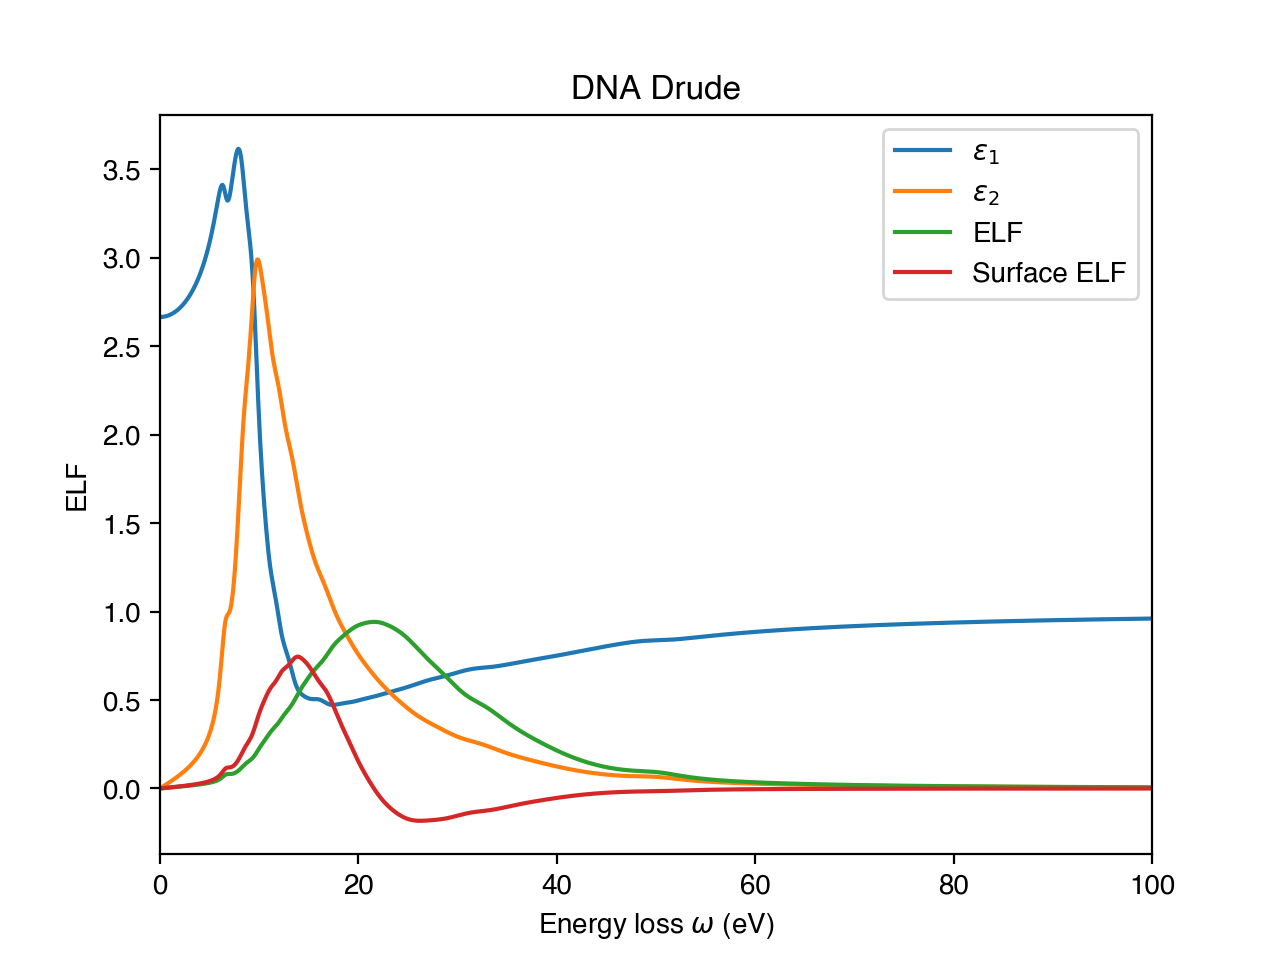

In [10]:
dna_drude.calculateELF()
dna_drude.calculateSurfaceELF()

plt.figure()
plt.plot(dna_drude.eloss,dna_drude.epsilon.real,label='$\epsilon_1$')
plt.plot(dna_drude.eloss,dna_drude.epsilon.imag,label='$\epsilon_2$')
plt.plot(dna_drude.eloss,dna_drude.ELF,label='ELF')
plt.plot(dna_drude.eloss,dna_drude.surfaceELF,label='Surface ELF')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{dna_drude.name} {dna_drude.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


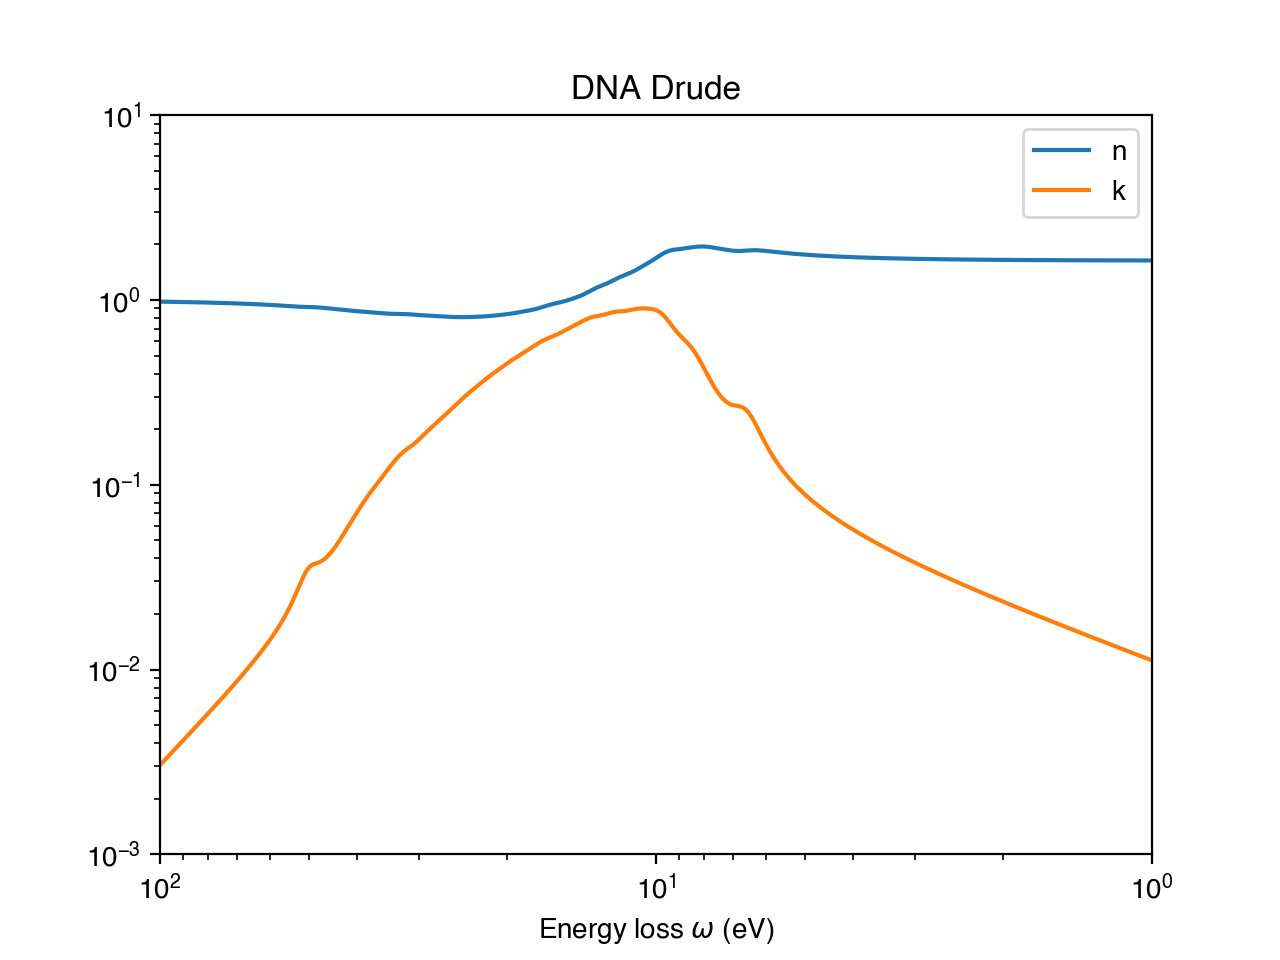

In [9]:
dna_drude.calculateOpticalConstants()

plt.figure()
plt.plot(dna_drude.eloss,dna_drude.refractive_index,label='n')
plt.plot(dna_drude.eloss,dna_drude.extinction_coefficient,label='k')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.legend()
plt.title(f'{dna_drude.name} {dna_drude.oscillators.model}')
plt.show()

In [4]:
dna_drude.writeOpticalData()

*Drude-Lindhard*

In [3]:
A = [0.039,0.077,0.081,0.043,0.064,0.066,0.075,0.078,0.064,0.064,0.017]
gamma = [3.49,4.4,4.6,3.63,4.04,4.3,5.12,6.95,10.34,13.53,22.91]
omega = [11.4,14.31,16.71,18.36,20.04,21.97,24.25,27.23,31.3,35.61,48.97]
oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 1)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = [0,1,2]

dna_dl = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_dl.Eg = 4.5
dna_dl.width_of_the_valence_band = 0.5
dna_dl.atomic_density = 0.087

In [4]:
A = [0.039,0.077,0.081,0.043,0.064,0.066,0.075,0.078,0.064,0.064,0.017]
gamma = [3.49,4.4,4.6,3.63,4.04,4.3,5.12,6.95,10.34,13.53,22.91]
omega = [11.4,14.31,16.71,18.36,20.04,21.97,24.25,27.23,31.3,35.61,48.97]
oscillators = opt.Oscillators('DLL', A, gamma, omega, alpha = 1)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = [0,1,2]

dna_dll = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_dll.Eg = 4.5
dna_dll.U = 9.5
dna_dll.width_of_the_valence_band = 0.5
dna_dll.atomic_density = 0.087

<IPython.core.display.Javascript object>


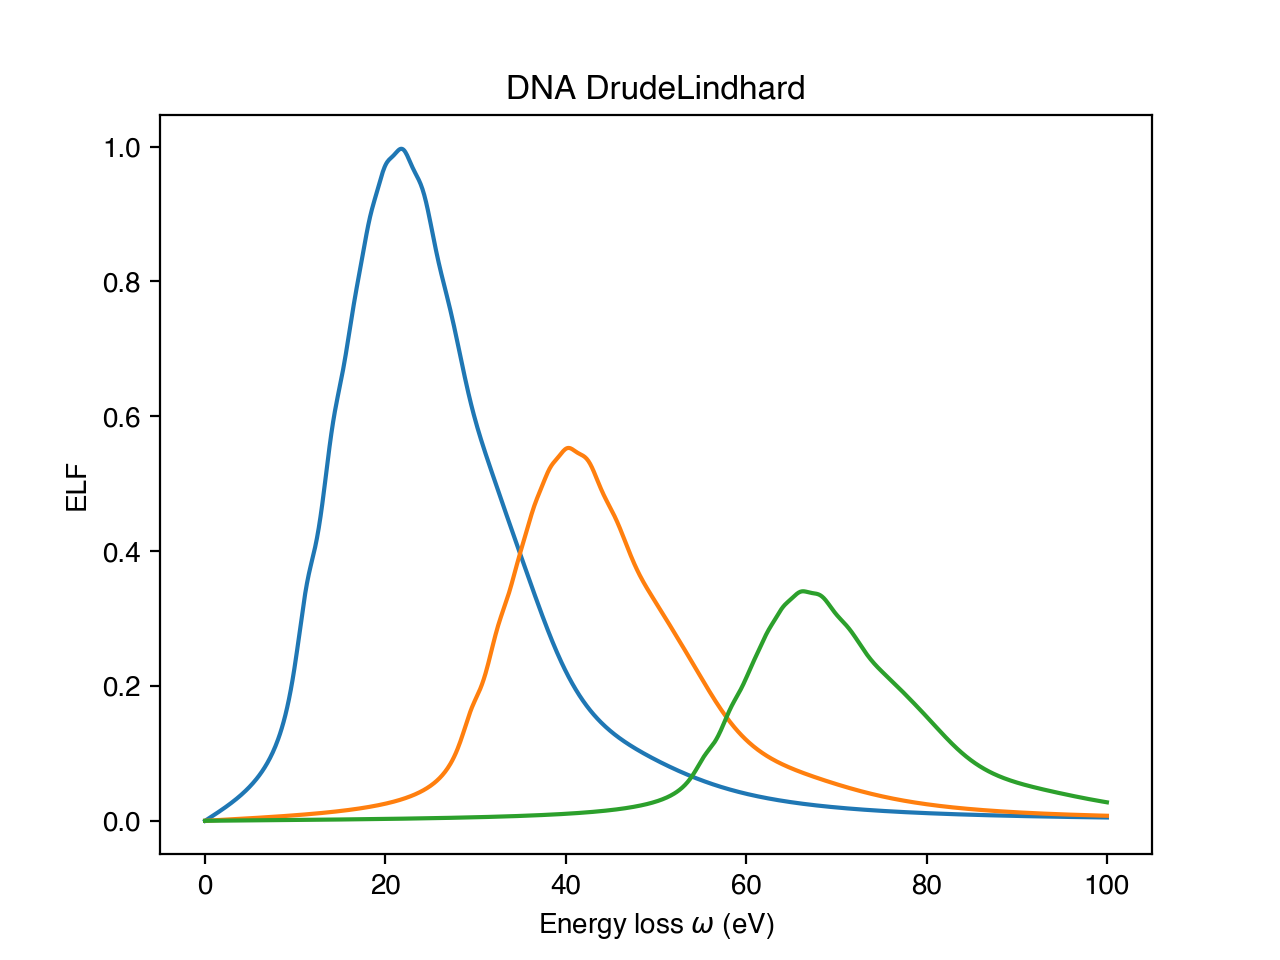

In [5]:
dna_dl.plotELF()

<IPython.core.display.Javascript object>


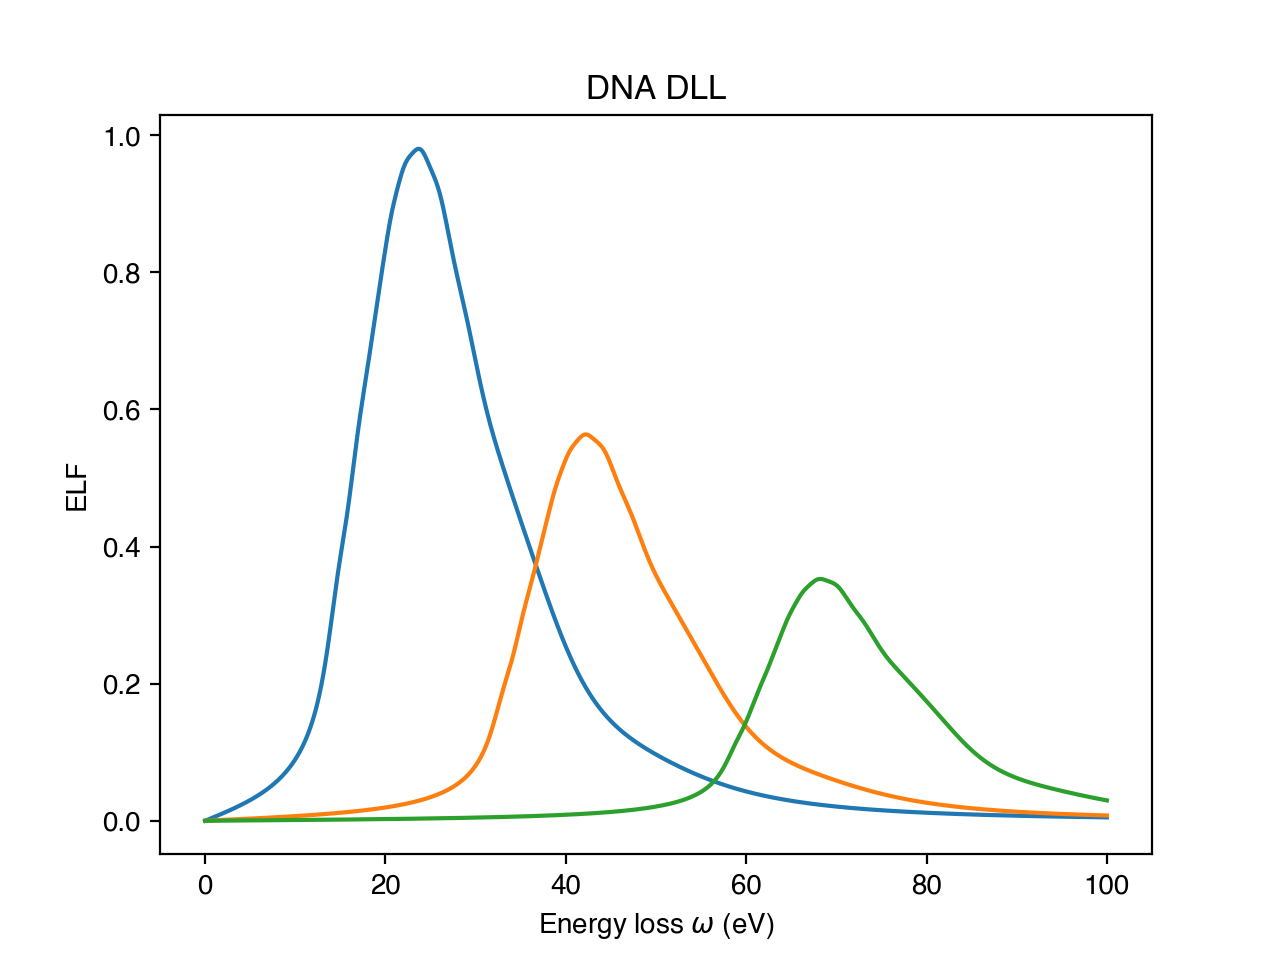

In [6]:
dna_dll.plotELF()

In [7]:
dna_dl.q = opt.linspace(0,5,0.05)
dna_dl.size_q = dna_dl.q.shape[0]
dna_dl.calculateELF()

<IPython.core.display.Javascript object>


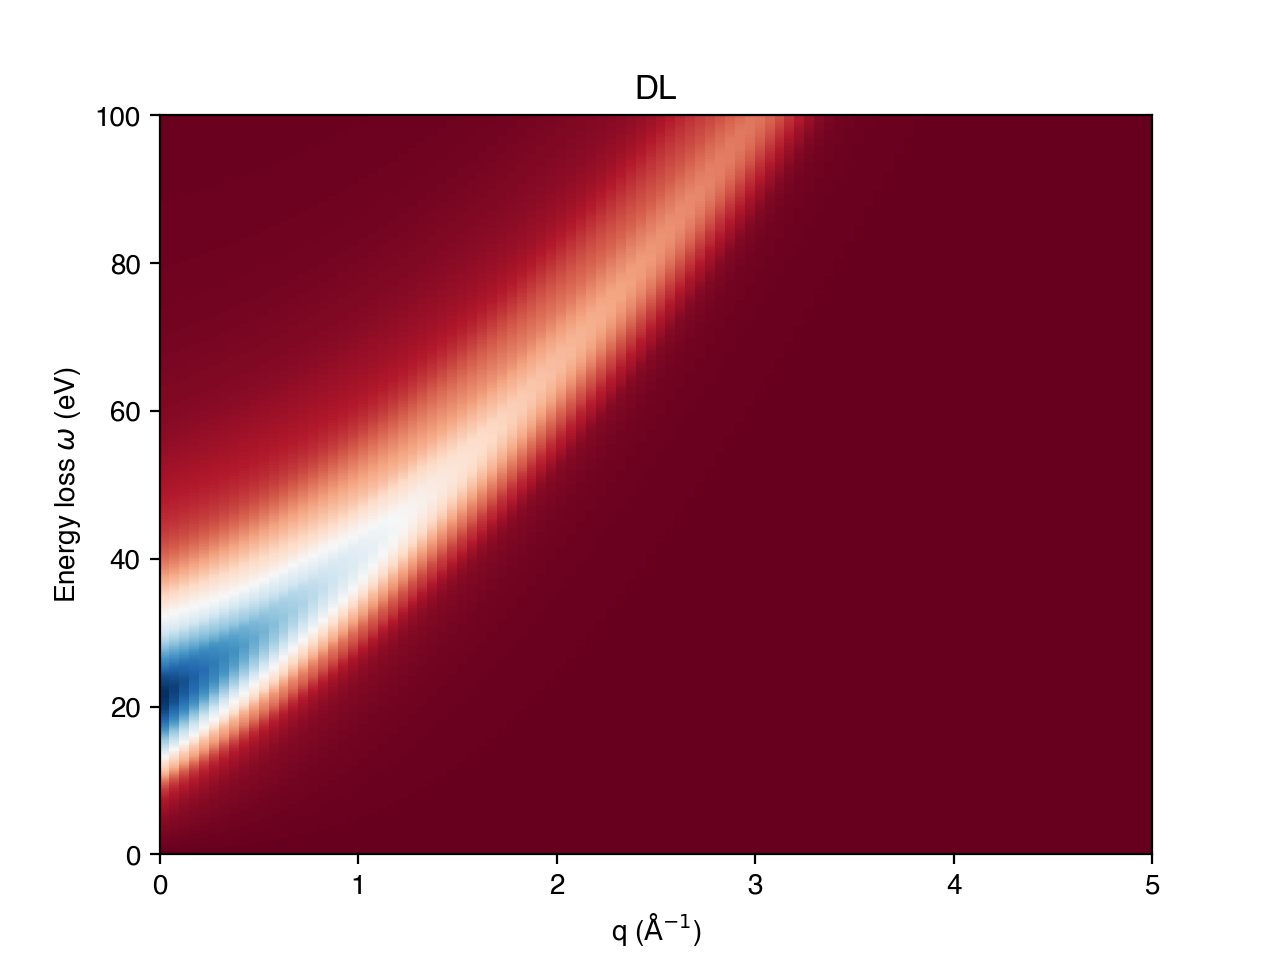

In [8]:
plt.figure()
plt.pcolor(dna_dl.q, dna_dl.eloss, dna_dl.ELF, cmap='RdBu', vmin=np.min(dna_dl.ELF), vmax=np.max(dna_dl.ELF))
plt.title('DL')
plt.xlabel('q ($\mathrm{\AA}^{-1}$)')
plt.ylabel('Energy loss $\omega$ (eV)')
plt.xlim(0, 5)
plt.ylim(0,100)
plt.show()

In [9]:
dna_dll.q = opt.linspace(0,5,0.05)
dna_dll.size_q = dna_dll.q.shape[0]
dna_dll.calculateELF()

<IPython.core.display.Javascript object>


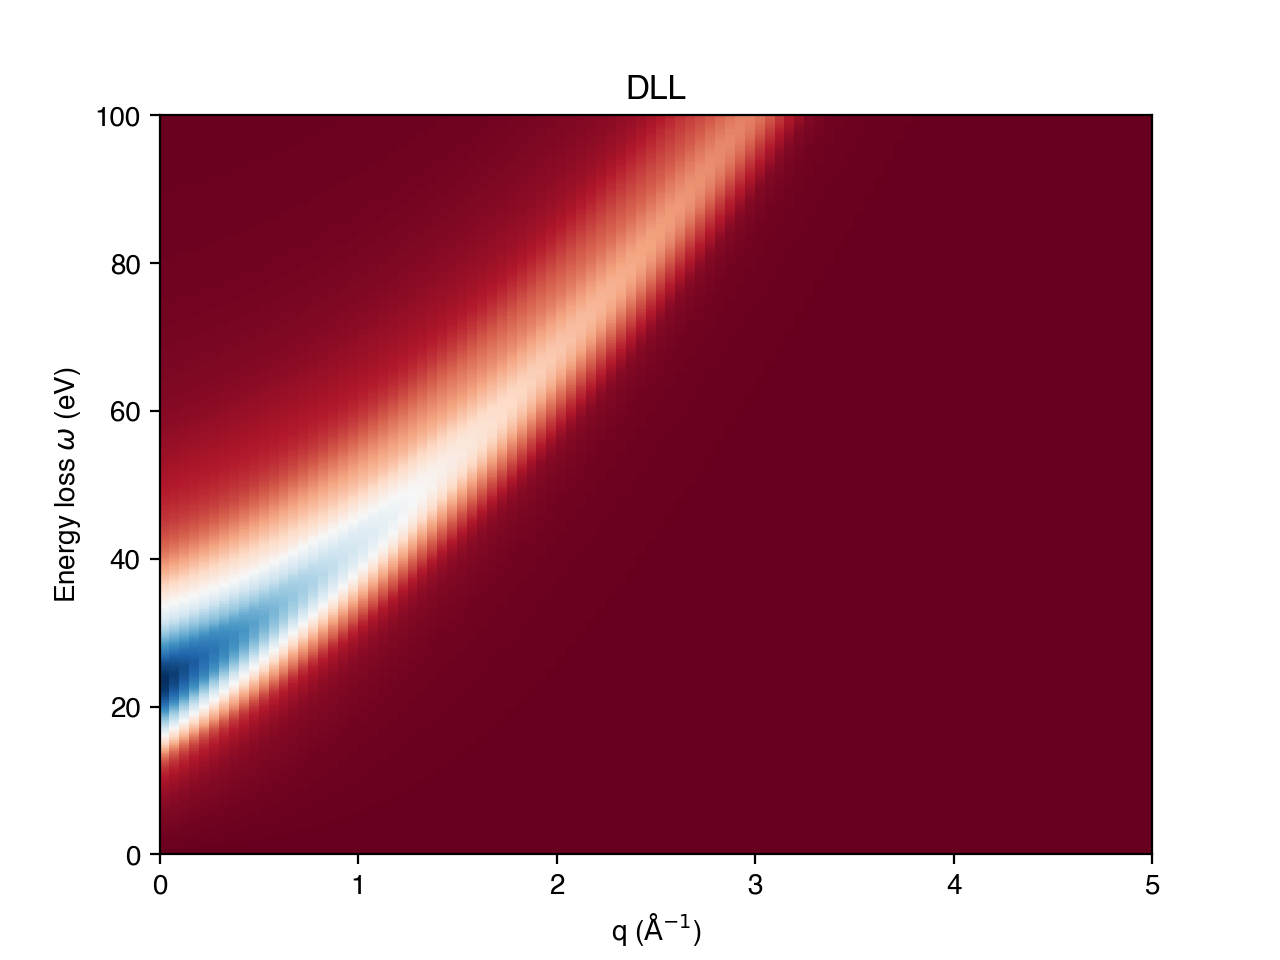

In [10]:
plt.figure()
plt.pcolor(dna_dll.q, dna_dll.eloss, dna_dll.ELF, cmap='RdBu', vmin=np.min(dna_dll.ELF), vmax=np.max(dna_dll.ELF))
plt.title('DLL')
plt.xlabel('q ($\mathrm{\AA}^{-1}$)')
plt.ylabel('Energy loss $\omega$ (eV)')
plt.xlim(0, 5)
plt.ylim(0,100)
plt.show()

<IPython.core.display.Javascript object>


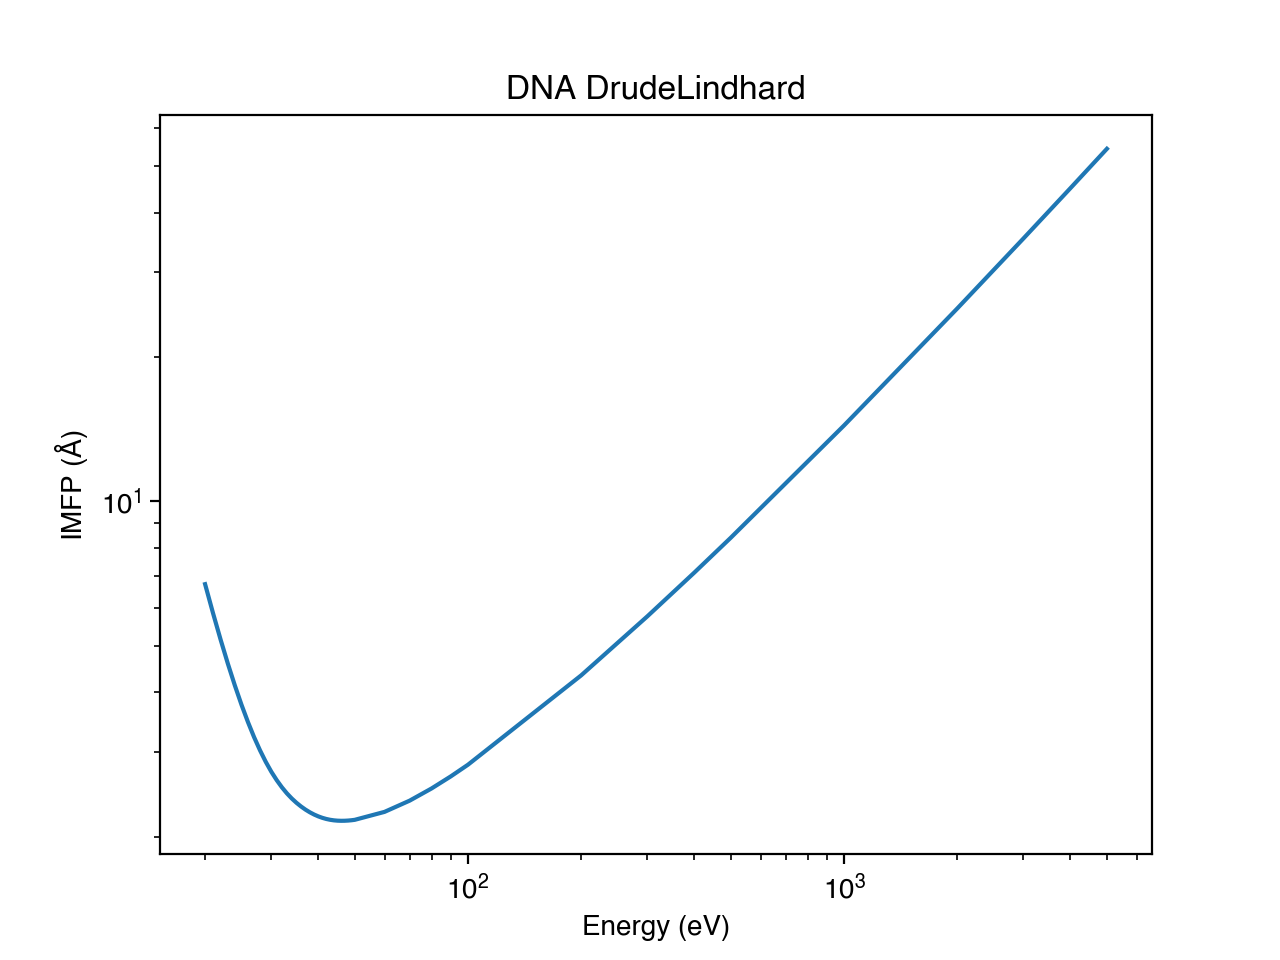

In [19]:
E0 = np.hstack((osc.linspace(20,50),osc.linspace(60,100,10),osc.linspace(200,500,100),osc.linspace(1000,5000,1000)))
dna_dl.plotIMFP(E0, isMetal=False)

In [11]:
A = [0.0369, 0.0535, 0.0973, 0.0731, 0.0446, 0.0475, 0.0441, 0.0356, 0.0390, 0.0495, 0.1450, 0.0825, 0.0478, 0.0686, 0.0552, 0.0309, 0.0208, 0.0281, 0.01, 0.01, 0.01, 0.01]
gamma = [2.4608, 2.7865, 2.8713, 2.5564, 3.7889, 2.5830, 2.5278, 2.0690, 2.5008, 2.6238, 2.9751, 2.7016, 2.0537, 2.6576, 2.4549, 2.0698, 1.9888, 2.0102, 3.0, 3.0, 3.0, 3.0]
omega = [9.2811, 11.3430, 13.3943, 15.0991, 15.9566, 16.7443, 17.2171, 18.4110, 18.0507, 19.5733, 21.8442, 20.0761, 23.5279, 24.6840, 26.4460, 27.9153, 29.1464, 30.4685, 33.0, 34.5, 36.0, 39.0]
oscillators = opt.Oscillators('Mermin', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

dna_m = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_m.Eg = 4.5
dna_m.width_of_the_valence_band = 0.5
dna_m.atomic_density = 0.087

<IPython.core.display.Javascript object>


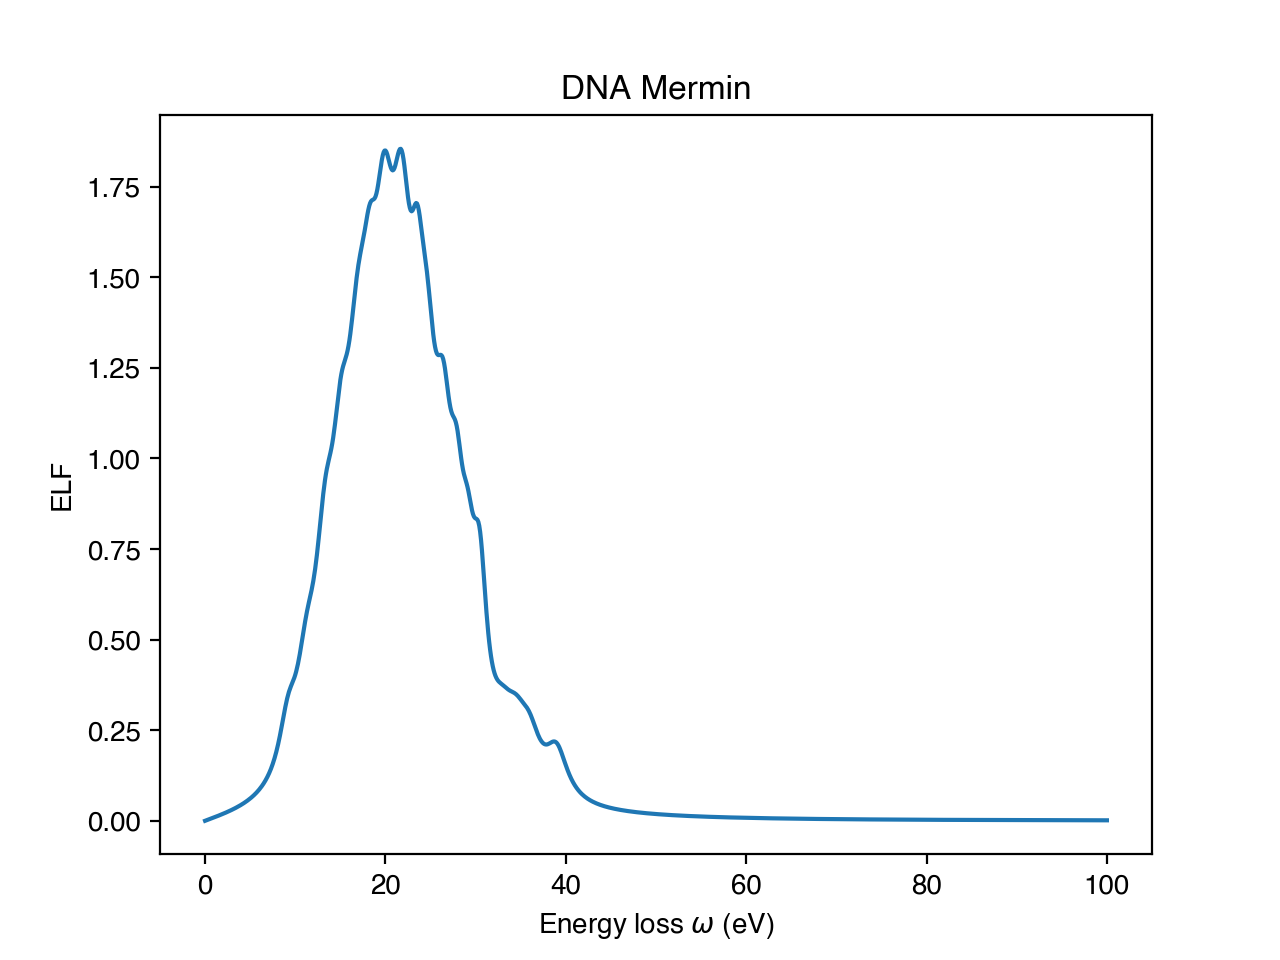

In [11]:
dna_m.plotELF()

In [12]:
dna_m.q = opt.linspace(0,5,0.05)
dna_m.size_q = dna_m.q.shape[0]
dna_m.calculateELF()

<IPython.core.display.Javascript object>


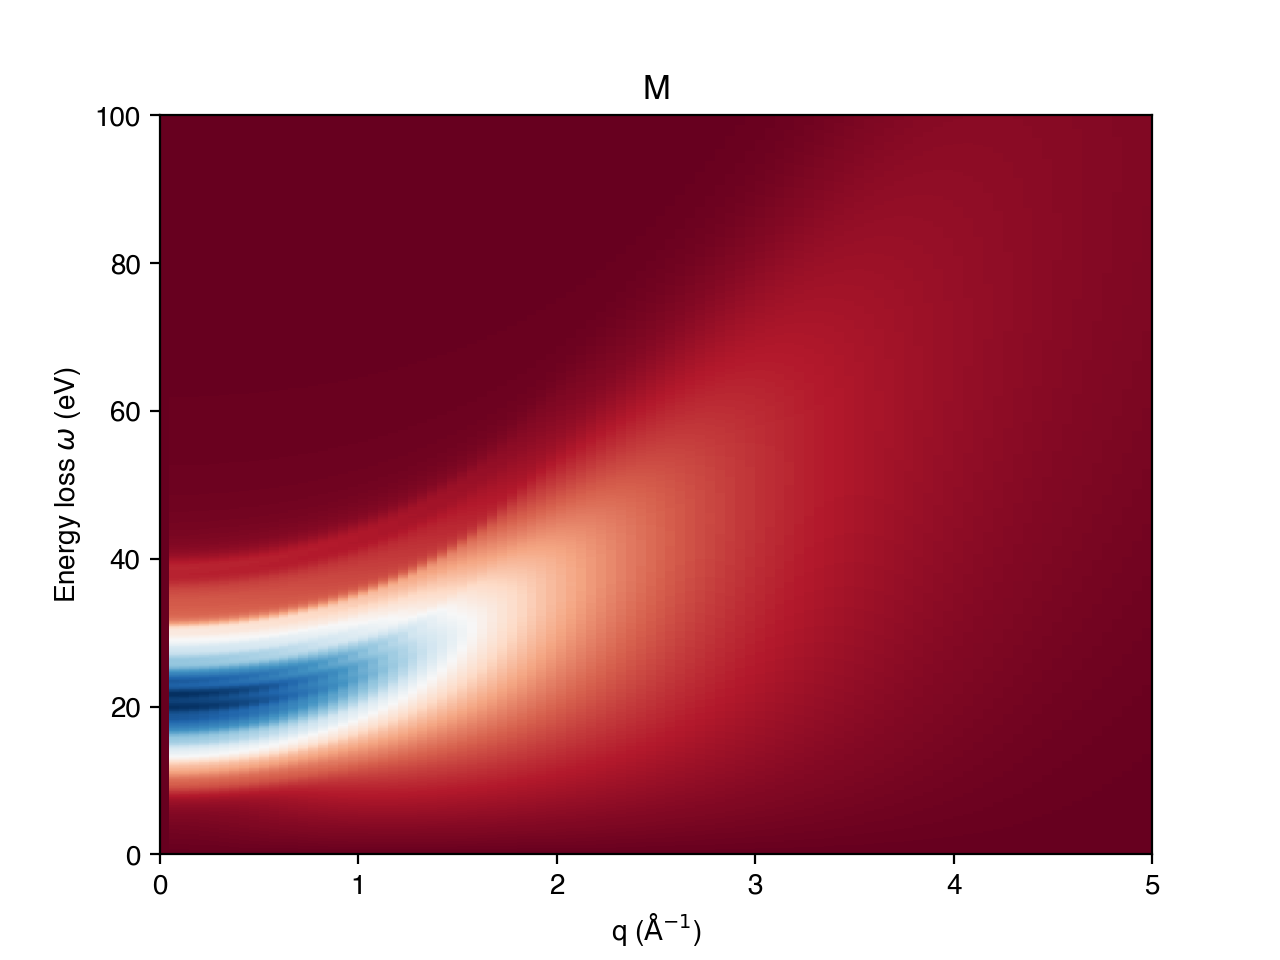

In [13]:
plt.figure()
plt.pcolor(dna_m.q, dna_m.eloss, dna_m.ELF, cmap='RdBu', vmin=np.min(dna_m.ELF), vmax=np.max(dna_m.ELF))
plt.title('M')
plt.xlabel('q ($\mathrm{\AA}^{-1}$)')
plt.ylabel('Energy loss $\omega$ (eV)')
plt.xlim(0, 5)
plt.ylim(0,100)
plt.show()

In [6]:
A = [0.0687, 0.1066, 0.1315, 0.0524, 0.1350, 0.0819, 0.0444, 0.0389, 0.0408, 0.0280, 0.0703, 0.0847, 0.0499, 0.0353, 0.0158, 0.0044, 0.0035, 0.0079]
gamma = [2.4242, 2.7729,  2.8469,  2.5496,  2.7058,  2.1034,  2.2504,  2.7825,  2.5090,  1.6338, 3.0196,  2.4304,  2.5927,  2.8110,  2.6007,  2.6,   3.0,   2.5188]
omega = [9.5769, 12.2692, 14.5514, 16.1348, 17.4904, 19.0871, 20.4145, 20.8734, 21.1905, 23.9497, 25.5281, 22.5438, 27.8767, 30.8498, 32.4821, 34.5476, 35.7188, 36.1944]
oscillators = opt.Oscillators('MerminLL', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','p','h'], [39,13,24,4,49])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0.01

dna_mll = opt.Material('DNA', oscillators, composition, eloss, q, xraypath)
dna_mll.Eg = 4.5
dna_mll.U = 5.4
dna_mll.width_of_the_valence_band = 0.5
dna_mll.atomic_density = 0.087

<IPython.core.display.Javascript object>


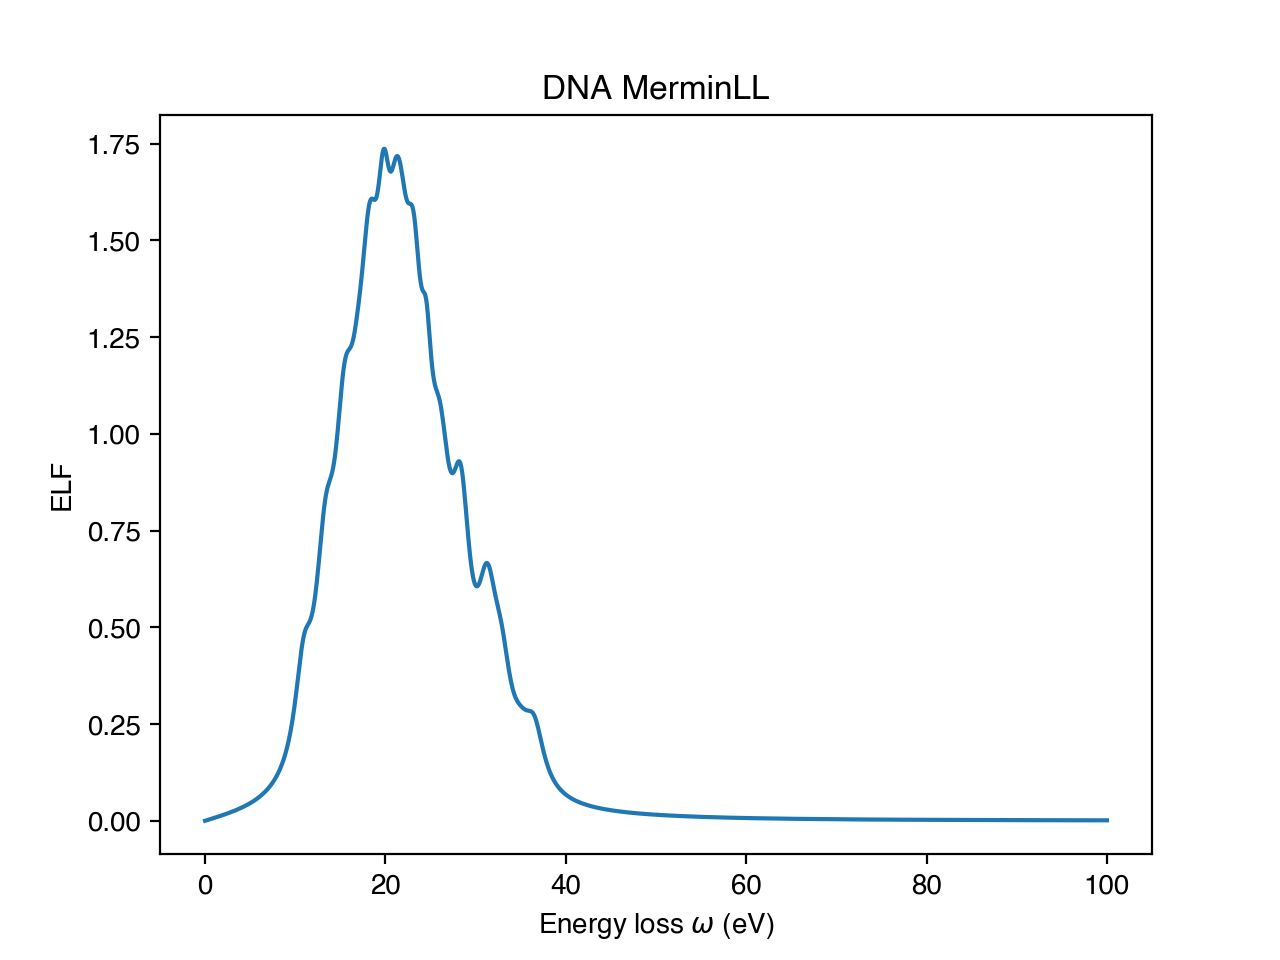

In [7]:
dna_mll.plotELF()

In [9]:
E0 = np.hstack((opt.linspace(20,50),opt.linspace(60,100,10),opt.linspace(200,500,100),opt.linspace(1000,5000,1000)))
dna_drude.calculateIMFP(E0, isMetal=False)
print("Done")
dna_dl.calculateIMFP(E0, isMetal=False)
print("Done")
dna_m.calculateIMFP(E0, isMetal=False)
print("Done")
dna_mll.calculateIMFP(E0, isMetal=False)
print("Done")

Done
Done
Done
Done


<IPython.core.display.Javascript object>


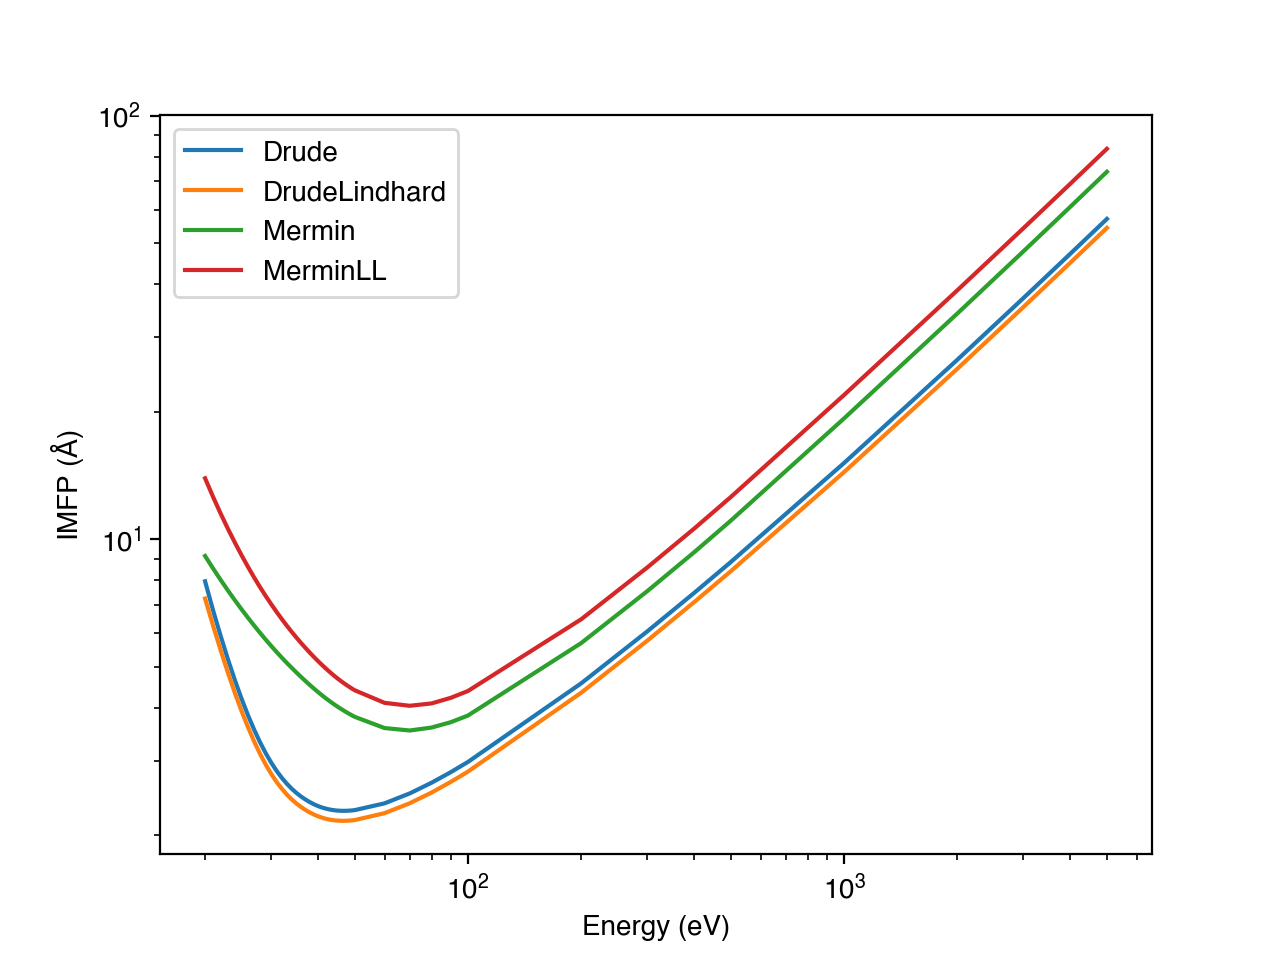

In [10]:
plt.figure()
plt.plot(E0, dna_drude.IMFP, label=f'{dna_drude.oscillators.model}')
plt.plot(E0, dna_dl.IMFP, label=f'{dna_dl.oscillators.model}')
plt.plot(E0, dna_m.IMFP, label=f'{dna_m.oscillators.model}')
plt.plot(E0, dna_mll.IMFP, label=f'{dna_mll.oscillators.model}')
plt.xlabel('Energy (eV)')
plt.ylabel('IMFP ($\mathrm{\AA}$)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [8]:
d = np.array([7, 8, -6, 0])

In [25]:
ind_ge = d >= 0
ind_lt = d < 0

if any(ind_lt):
    print("Yes")
if any(ind_ge):
    print("No")

Yes
No


In [23]:
any(ind_lt)

True

**Irganox**

In [16]:
A = [4.19,16.58,32.18,55.48,35.05,9.03,21.51,25.32,29.22,11.87,34.75,30.35,30.16,30.86,16.16]
gamma = [0.7,2.3,3.3,4.1,4.2,3.2,5.3,6.2,8.0,14.5,11.5,13.7,14.3,16.5,14.0]
omega = [6.2,9.6,11.4,13.6,16.2,18.3,19.7,22.0,25.4,30.0,30.6,38.0,46.6,56.7,72.9]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','o','h'], [73,12,108])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

irganox_drude = opt.Material('Irganox', oscillators, composition, eloss, q, xraypath)
irganox_drude.Eg = 5.4
irganox_drude.width_of_the_valence_band = 10
irganox_drude.atomic_density = 0.113
irganox_drude.static_refractive_index = 1.4
irganox_drude.electron_density = 0.278
irganox_drude.Z = 3.3

<IPython.core.display.Javascript object>


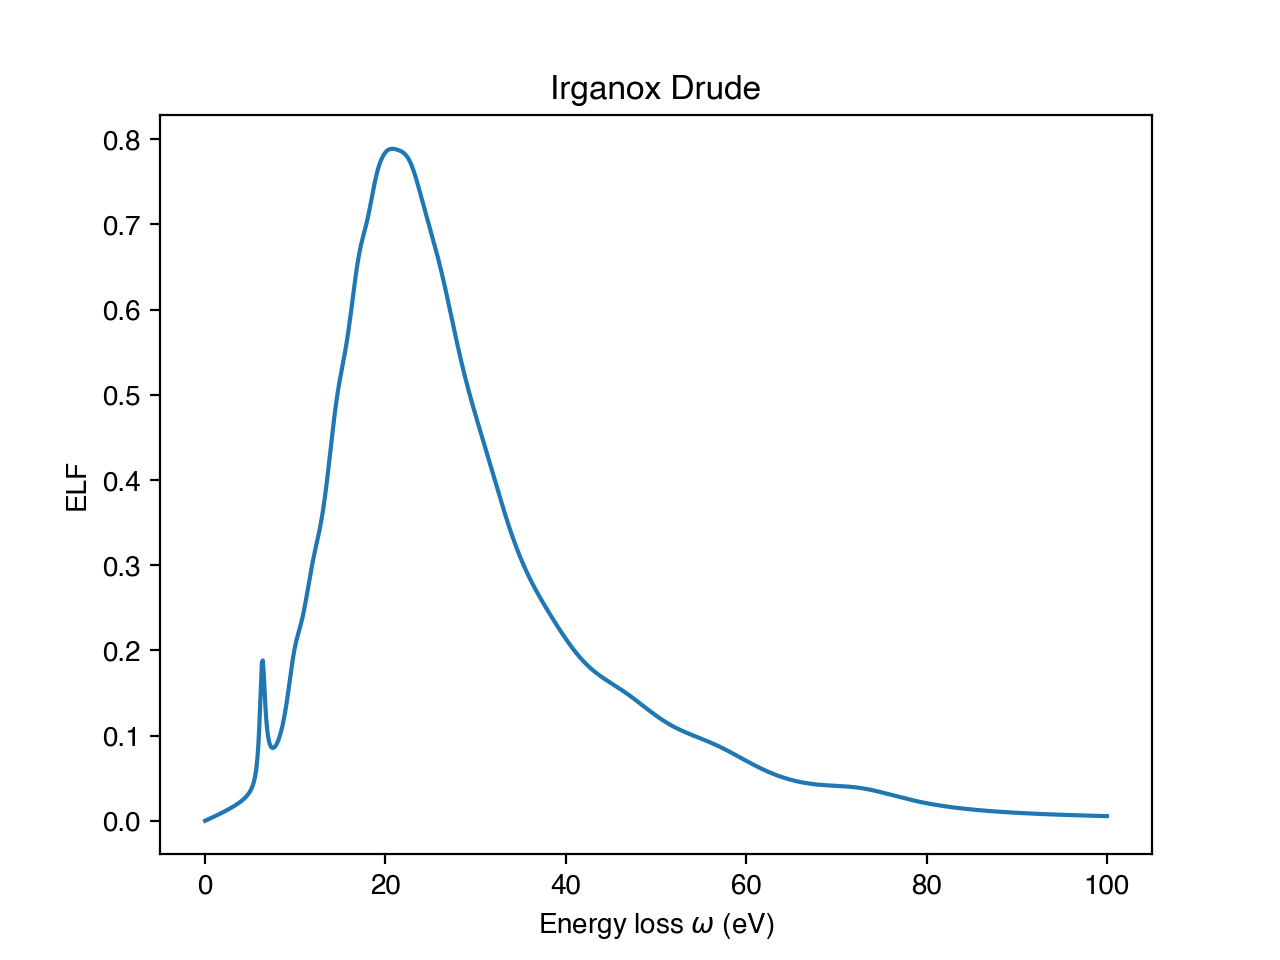

In [17]:
irganox_drude.plotELF()

In [ ]:
irganox_drude.writeOpticalData()

**Kapton**

In [9]:
A = [30.3300, 9.3000, 23.8700, 42.6400, 42.3600, 35.4100, 71.0900, 38.1300, 31.0700, 32.3500, 30.4500, 27.7000, 10.89]
gamma = [1.9000, 1.5000, 2.5000, 3.5000, 5.0, 6.3000, 10.1000, 10.2000, 11.6000, 15.2000, 17.7000, 14.1000, 8.7000]
omega = [5.5000, 8.7000, 10.1000, 11.8000, 14.2000, 16.7000, 20.1000, 25.3000, 31.4000, 38.2000, 47.5000, 57.0, 66.1000]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','n','o','h'], [22,2,5,10])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

kapton_drude = opt.Material('Kapton', oscillators, composition, eloss, q, xraypath)
kapton_drude.Eg = 4.2
kapton_drude.width_of_the_valence_band = 10
kapton_drude.atomic_density = 0.087
kapton_drude.static_refractive_index = 1.7
kapton_drude.electron_density = 0.309
kapton_drude.Z = 5

<IPython.core.display.Javascript object>


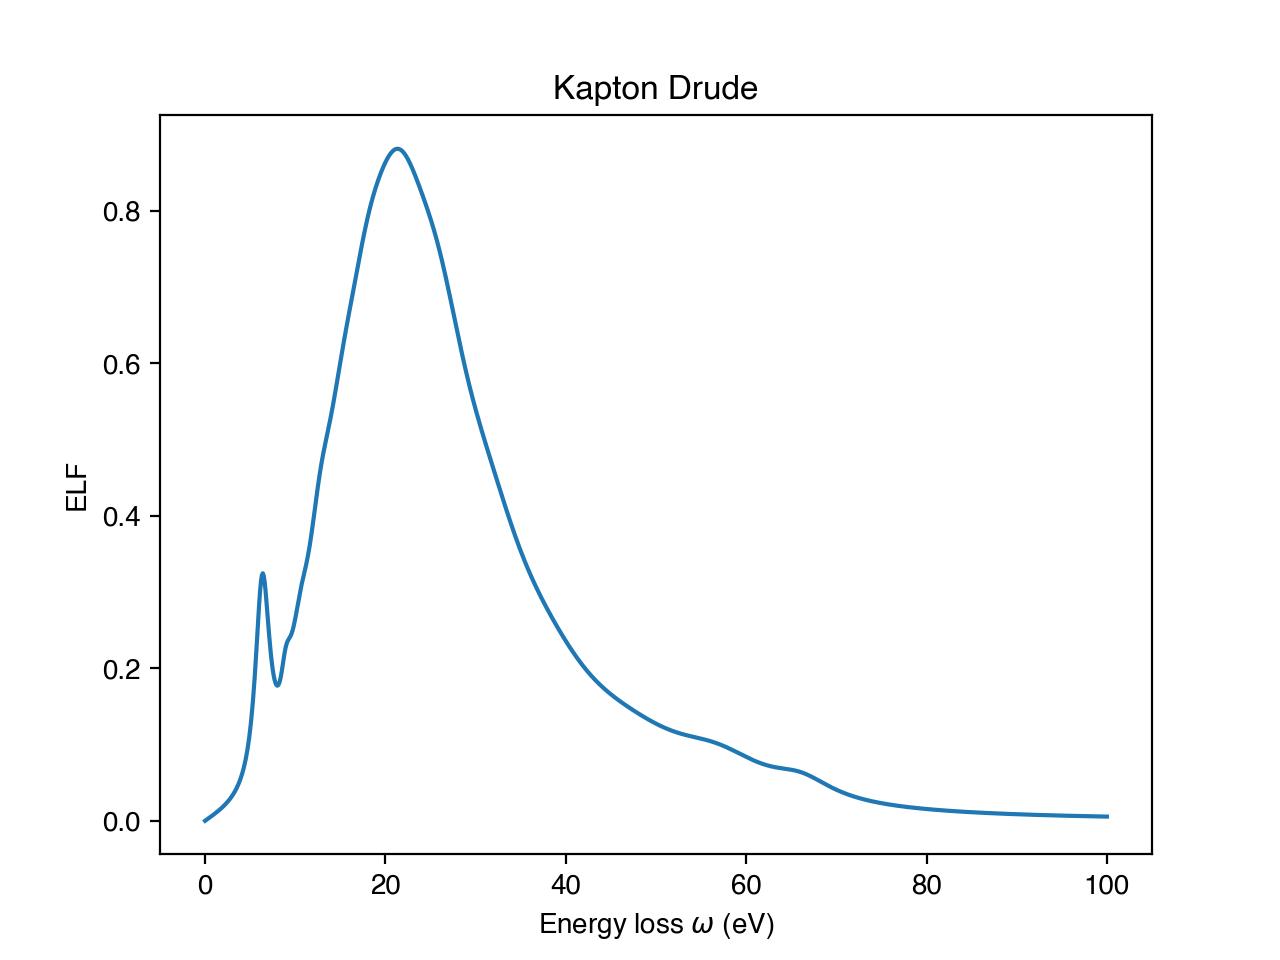

In [10]:
kapton_drude.plotELF()

In [11]:
kapton_drude.writeOpticalData()

**PE**

In [3]:
A = [30.9649, 33.8626, 33.8368, 29.324 , 26.0666, 27.1075, 27.4519, 10.9467, 12.1362, 18.0936, 20.9278, 34.1272, 20.536,  8.4471]
gamma = [0.6, 1.5, 2.6, 2.9, 3.6, 11.9, 4.4, 3.4, 3.9, 6.7, 12.1, 14.3, 16.8, 89.7]
omega = [7.9, 8.4, 9.7, 10.9, 12.5, 14.8, 14.9, 17.3, 19.5, 22.2, 26.0, 26.1, 31.2, 72.0]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','h'], [2,4])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

pe_drude = opt.Material('PE', oscillators, composition, eloss, q, xraypath)
pe_drude.Eg = 7.5
pe_drude.width_of_the_valence_band = 10
pe_drude.atomic_density = 0.121
pe_drude.static_refractive_index = 1.49
pe_drude.electron_density = 0.242
pe_drude.Z = 2.7

<IPython.core.display.Javascript object>


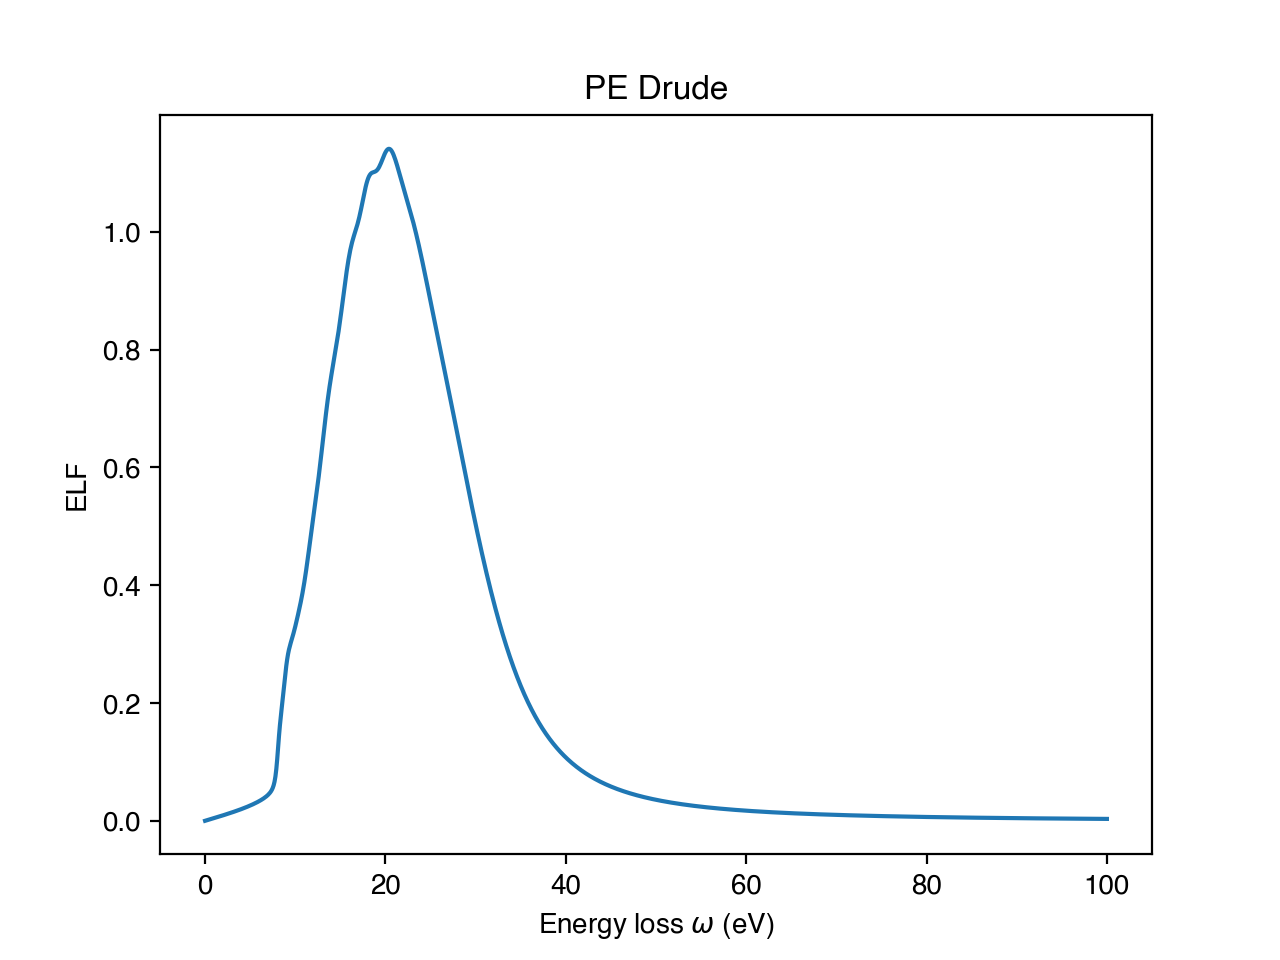

In [14]:
pe_drude.plotELF()

In [4]:
pe_drude.evaluateFsum()

2.5848221897635284

In [5]:
pe_drude.writeOpticalData()

**PMMA**

In [7]:
A = [11.9637, 25.1598, 22.138 , 26.6971, 27.7229, 29.5537, 27.6149, 23.4497, 39.2408, 28.3709, 28.4939, 22.4436, 16.7607, 19.9005, 41.9562]
gamma = [2.1, 2.2, 2.1, 2.6, 3.1, 4.0, 5.1, 6.1, 9.3, 11.6, 15.8, 16.6, 21.2, 22.3, 41.6]
omega = [9.3, 10.5, 11.9, 13.2, 14.6, 16.5, 18.7, 21.2, 24.2, 28.5, 32.0, 36.3, 44.6, 48.4 ,62.0]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','o','h'], [5,2,8])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

pmma_drude = opt.Material('PMMA', oscillators, composition, eloss, q, xraypath)
pmma_drude.Eg = 6.7
pmma_drude.width_of_the_valence_band = 10
pmma_drude.atomic_density = 0.106
pmma_drude.static_refractive_index = 1.48
pmma_drude.electron_density = 0.284
pmma_drude.Z = 3.6

<IPython.core.display.Javascript object>


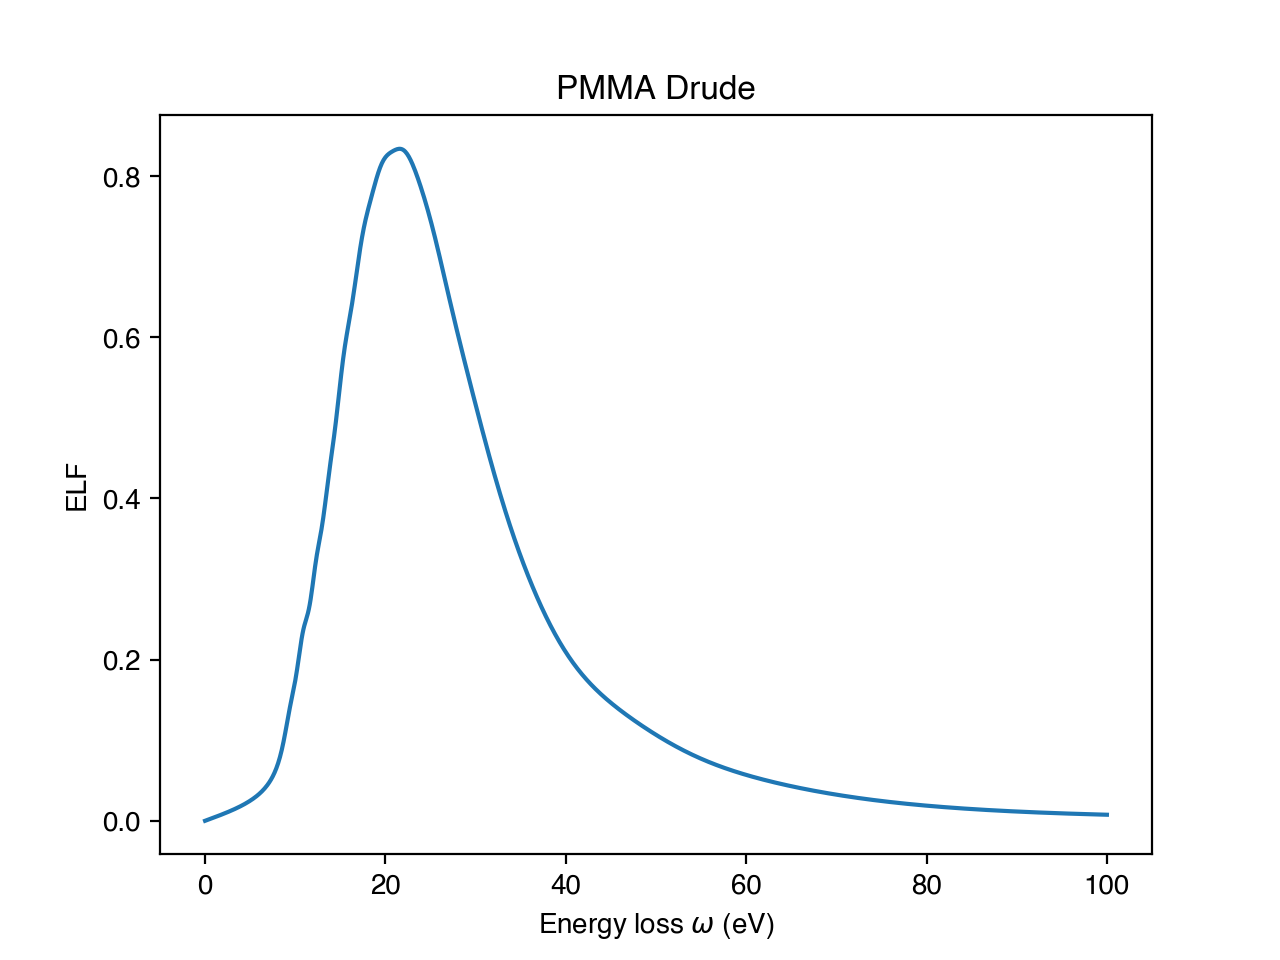

In [8]:
pmma_drude.plotELF()

In [9]:
pmma_drude.writeOpticalData()

**PS**

In [10]:
A = [61.94, 6.89,32.36,34.78,31.78,40.3,36.12,27.7,22.66,18.23,12.48,9.55]
gamma = [0.5,0.5,5.2,2.7,3,3.8,4.5,5.2,5.4,5.3,4.8,4.7]
omega = [5.2,8.9,9.6,9.8,11.8,14.2,17.1,20.3,23.6,27.1,30.6,34.4]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','h'], [8,8])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ps_drude = opt.Material('PS', oscillators, composition, eloss, q, xraypath)
ps_drude.Eg = 5.7
ps_drude.width_of_the_valence_band = 10
ps_drude.atomic_density = 0.097
ps_drude.static_refractive_index = 1.56
ps_drude.electron_density = 0.242
ps_drude.Z = 3.5

<IPython.core.display.Javascript object>


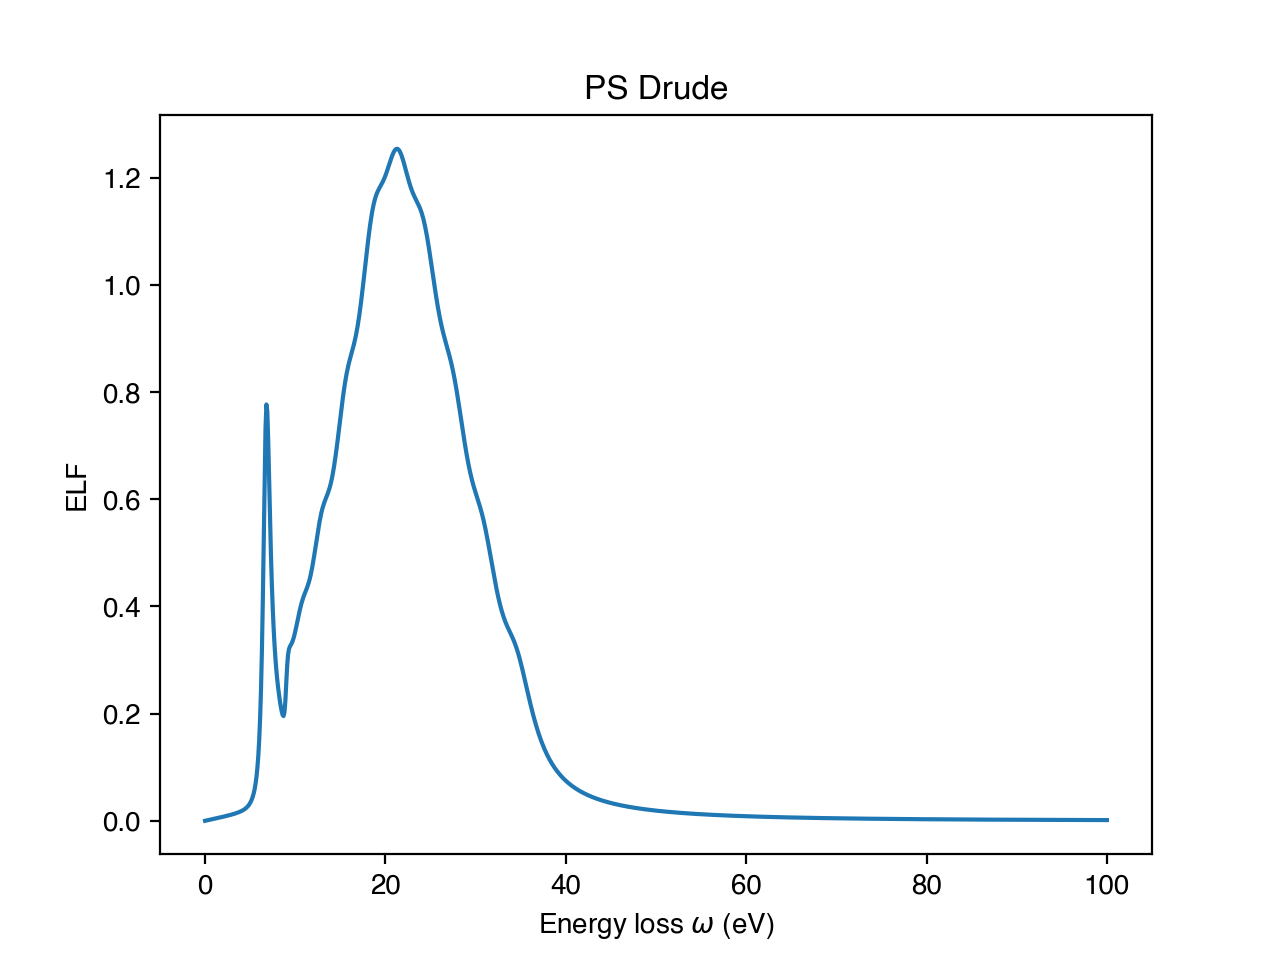

In [11]:
ps_drude.plotELF()

In [12]:
ps_drude.writeOpticalData()

**PTFE**

In [13]:
A = [0.93,3.87,39.19,15.06,38.65,92.64,105,185,168.28]
gamma = [0.4,1.04,3.27,4.6,5.28,11.81,21.96,41.3,191.86]
omega = [7.94,12.38,15.57,19.54,20.42,26.11,36.96,52.95,86.83]
oscillators = opt.Oscillators('Drude', A, gamma, omega, alpha = 0)
composition = opt.Composition(['c','f'], [2,4])
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

ptfe_drude = opt.Material('PTFE', oscillators, composition, eloss, q, xraypath)
ptfe_drude.Eg = 7.2
ptfe_drude.width_of_the_valence_band = 5.5
ptfe_drude.atomic_density = 0.078
ptfe_drude.static_refractive_index = 1.39
ptfe_drude.electron_density = 0.47
ptfe_drude.Z = 8

<IPython.core.display.Javascript object>


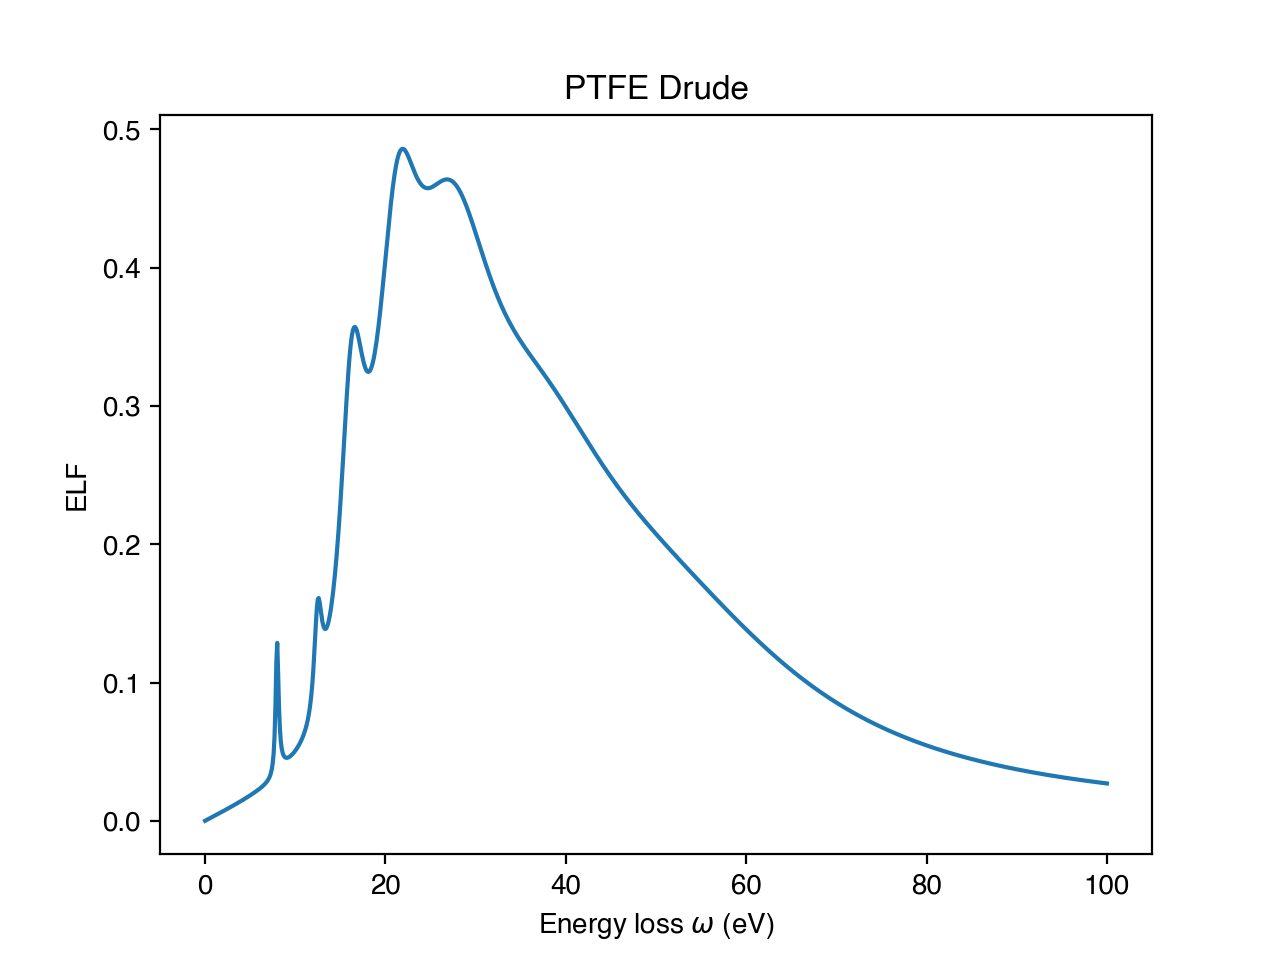

In [15]:
ptfe_drude.plotELF()

In [16]:
ptfe_drude.writeOpticalData()

**Au**

In [14]:
A = [0.01, 0.02, 0.07, 0.1, 0.07,0.007, 0.16, 0.15,0.13,0.08,0.02,0.09,0.16,0.02,0.003,0.005,0.008]
omega = [2.62,3.34,6.31,10.58,17.08,25.75,25.39,33.65,39.17,45.72,52.12,14.57,64.21,96.19,278.92,210.69,470.93]
gamma = [0.29,0.81,3.05,5.62,5.04,2.05,8.04,8.56,10.86,10.79,11.13,5.39,29.85,34.51,38.38,62.79,376.54]
oscillators = opt.Oscillators('DrudeLindhard', A, gamma, omega, alpha = 1)
composition = opt.Composition('au', 1)
eloss = opt.linspace(opt.machine_eps,100,0.1)
q = 0

au_dl = opt.Material('Au', oscillators, composition, eloss, q, xraypath)
au_dl.Ef = 9
au_dl.atomic_density = 0.059

<IPython.core.display.Javascript object>


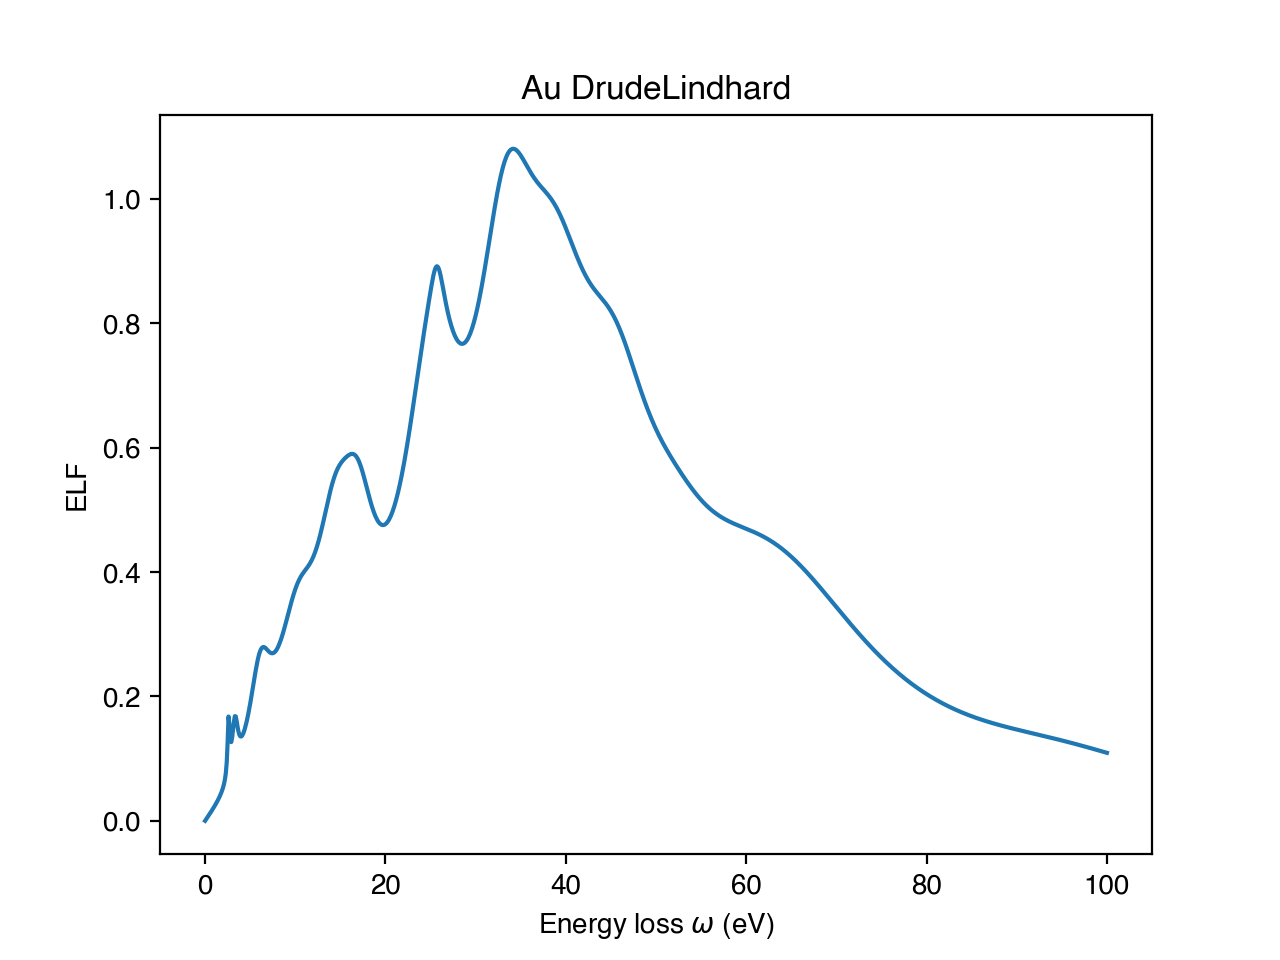

In [16]:
au_dl.plotELF()

<IPython.core.display.Javascript object>


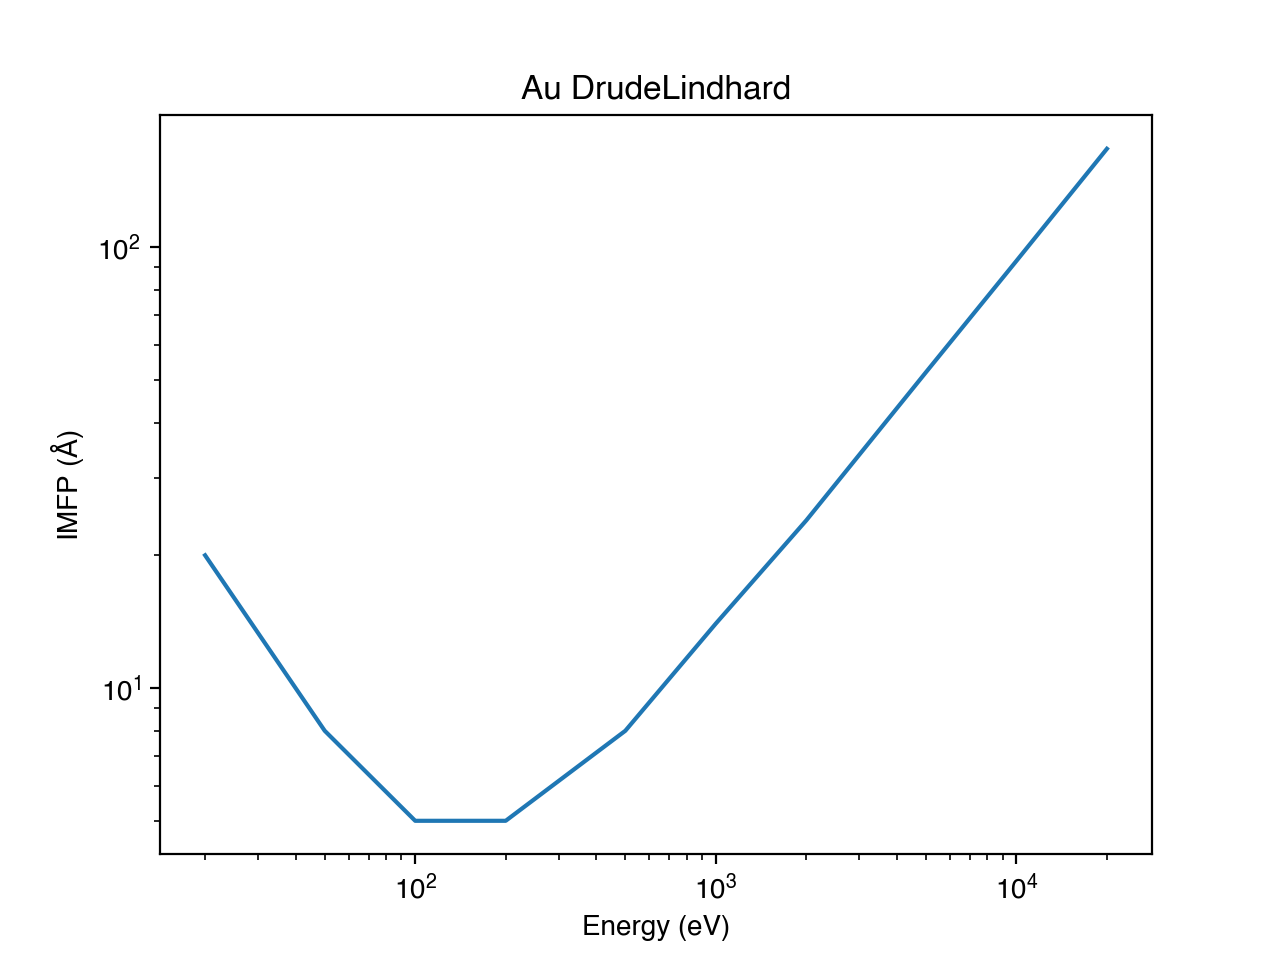

In [15]:
E0 = np.array([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]) # eV
au_dl.plotIMFP(E0)

<IPython.core.display.Javascript object>


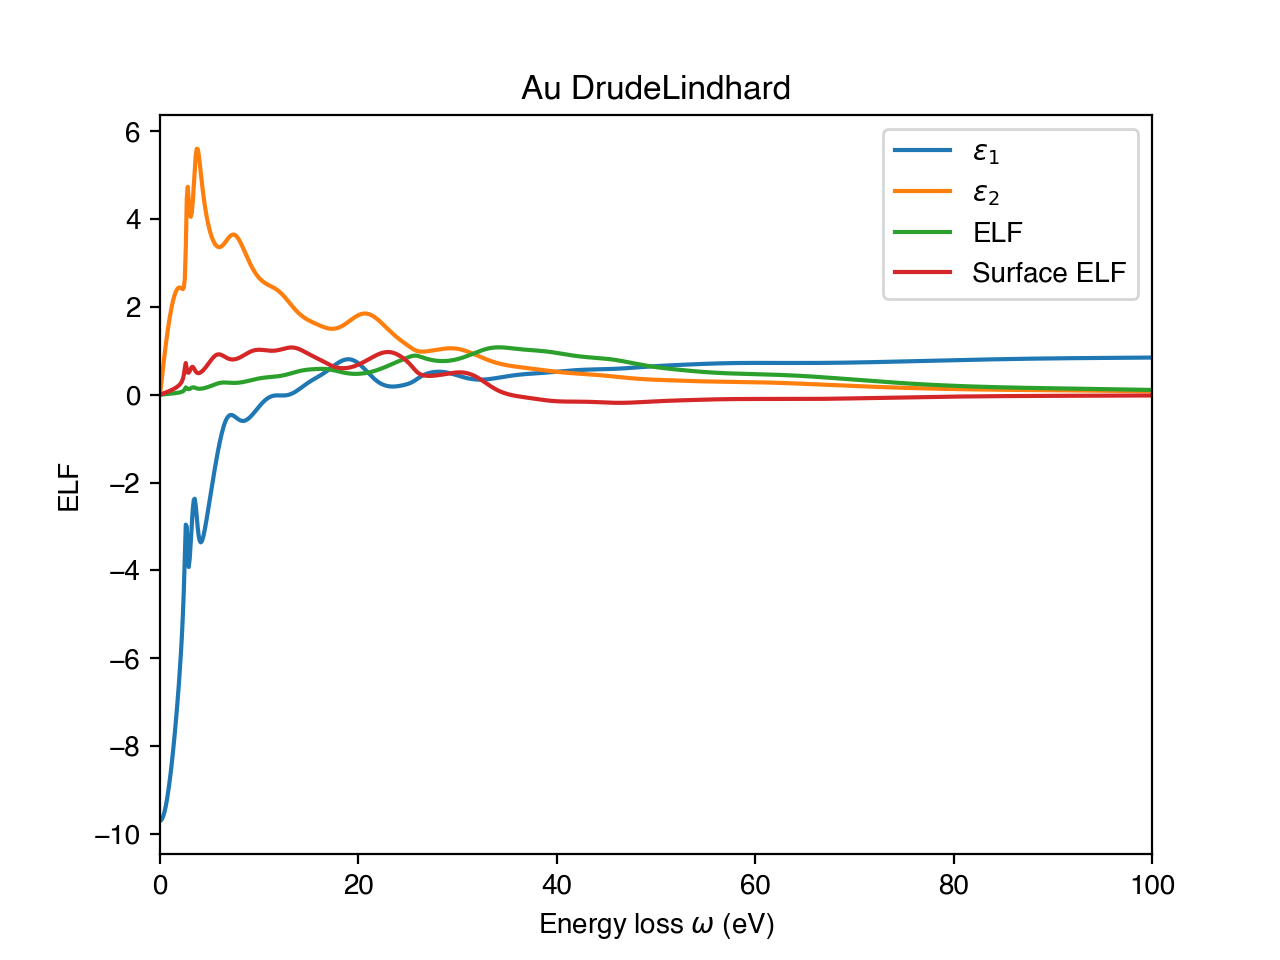

In [17]:
au_dl.calculateELF()
au_dl.calculateSurfaceELF()

plt.figure()
plt.plot(au_dl.eloss,au_dl.epsilon.real,label='$\epsilon_1$')
plt.plot(au_dl.eloss,au_dl.epsilon.imag,label='$\epsilon_2$')
plt.plot(au_dl.eloss,au_dl.ELF,label='ELF')
plt.plot(au_dl.eloss,au_dl.surfaceELF,label='Surface ELF')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.ylabel('ELF')
plt.title(f'{au_dl.name} {au_dl.oscillators.model}')
plt.xlim(0,100)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


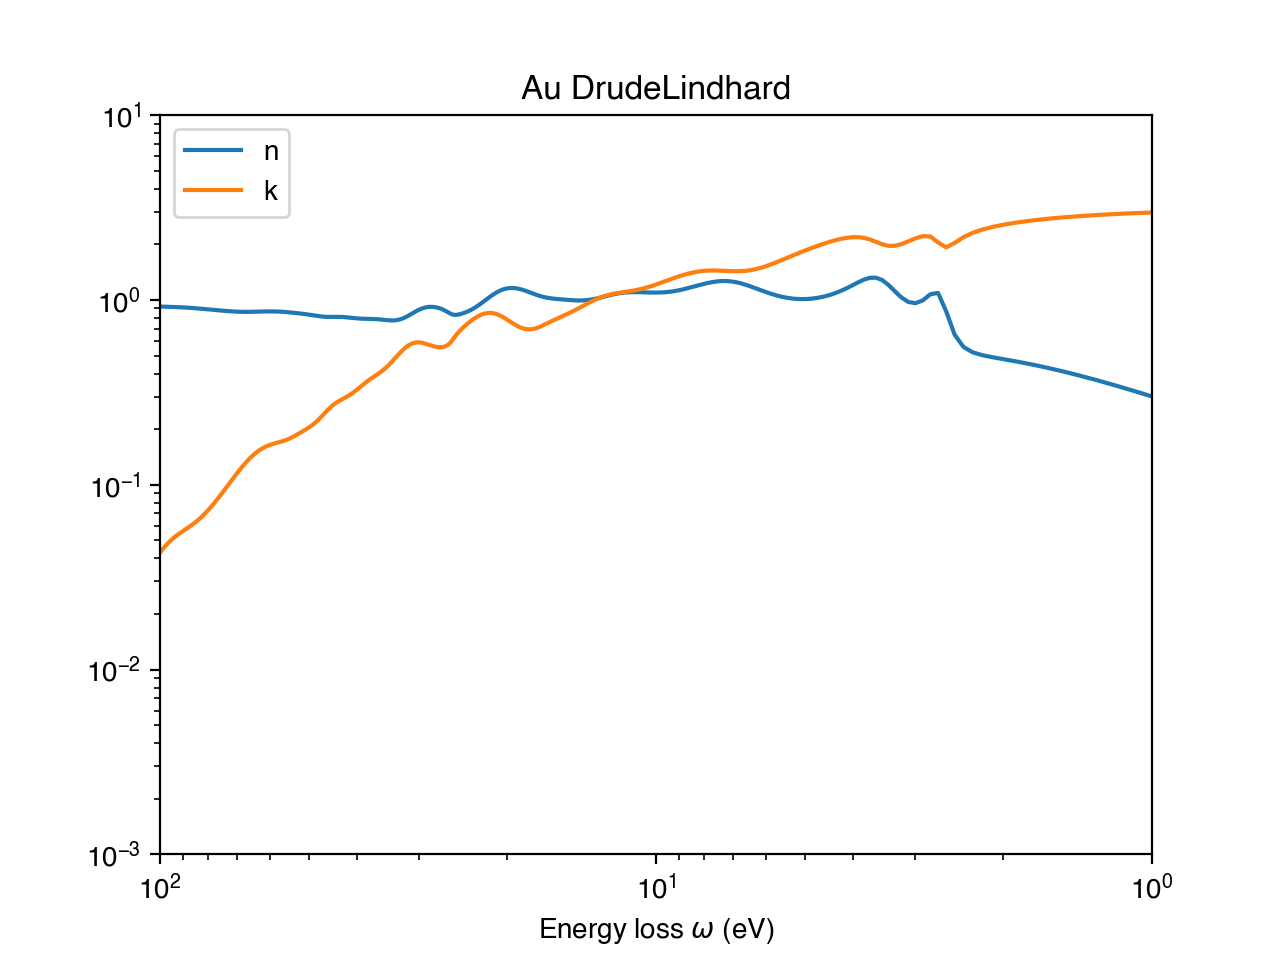

In [18]:
au_dl.calculateOpticalConstants()

plt.figure()
plt.plot(au_dl.eloss,au_dl.refractive_index,label='n')
plt.plot(au_dl.eloss,au_dl.extinction_coefficient,label='k')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Energy loss $\omega$ (eV)')
plt.xlim(100,1)
plt.ylim(0.001,10)
plt.legend()
plt.title(f'{au_dl.name} {au_dl.oscillators.model}')
plt.show()